In [1]:
# Third-party imports
from math import ceil

# Own imports
from src.display import DisplayModel
from src.new.aco import FreeAnt
from src.new.acs import BWACS
from src.new.helpers import get_distances_matrix
from src.new.heuristics import HeuristicModel
from src.new.metaheuristics import GeneralVNS
from src.new.models import VRPModel
from src.readers import ReaderCVRPLIB

In [2]:
# Parameters to handle the algorithm

%matplotlib inline
ALPHA = 1 # 0.75, 1, 1.05, 1.1, 1.25, 1.5, 1.75, 2
ANTS_NUM_RELATION = 2  # 1, 2
BETA = 3  # 2, 2.5, 3,  3.5
CANDIDATE_NODES_TYPE = 'best'  # None, 'best', 'random'
DELTA = 2  # 1, 2, 3, 4
GAMMA = 2  # 1, 1.5 2
# ['distance'], ['saving'], ['distance', 'saving']
HEURISTICS_TO_USE = ['distance', 'saving']
INSTANCE = 'instances/CVRPLIB/Golden/Golden_20'
ITERATION_LOCAL_SEARCH_MODEL = GeneralVNS  # None, GeneralVNS
MAX_ITERATIONS = 500
MIN_ITERATIONS = 200
P = 0.2  # 0.05, 0.1, 0.15, 0.2, 0.25, 0.3
P_M = 0.2
PHEROMONES_LOCAL_UPDATE = True
PROBABILITIES_MATRIX_TYPE = 'classic'  # 'classic', 'normalized'
Q_0 = 0.9
SIMILARITY_OF_ARCS_TO_DO_RESTART = 0.7  # 0.60, 0.70, 0.75, 0.80
# 0.885, 0.89, 0.9, 0.92, 0.95, 0.99
SIMILARITY_OF_QUALITIES_TO_DO_RESTART = None
TARE_PERCENTAGE = 0.15


In [3]:
# Initialize everything

reader = ReaderCVRPLIB(INSTANCE)
depot, clients, loc_x, loc_y, demands, _, max_capacity, k_optimal, _ = \
    reader.read()

nodes, demands, matrix_coords = VRPModel.get_normalize_instance_parameters(
    depot,
    clients,
    demands,
    loc_x,
    loc_y)

errors = VRPModel.validate_instance(nodes, demands, max_capacity)
if errors:
    raise Exception(errors)

iterations = max(round(len(nodes), -2), MIN_ITERATIONS)
matrix_distances = get_distances_matrix(nodes, matrix_coords)

parameters_heuristics = {
    'demands': demands,
    'importance_distances': BETA,
    'importance_savings': GAMMA,
    'matrix_coords': matrix_coords,
    'nodes': nodes,
}

heuristics = HeuristicModel(**parameters_heuristics)
matrix_heuristics = heuristics.get_heuristic_matrix(HEURISTICS_TO_USE)

parameters_ants = {
    'alpha': ALPHA,
    'ants_num': ceil(len(clients) / ANTS_NUM_RELATION),
    'beta': BETA,
    'delta': DELTA,
    'demands': demands,
    'ipynb': True,
    'k_optimal': k_optimal,
    'matrix_costs': matrix_distances,
    'matrix_heuristics': matrix_heuristics,
    'max_capacity': max_capacity,
    'max_iterations': min(iterations, MAX_ITERATIONS),
    'model_ant': FreeAnt,
    'model_ls_it': ITERATION_LOCAL_SEARCH_MODEL,
    'model_problem': VRPModel,
    'nodes': nodes,
    'p_m': P_M,
    'p': P,
    'percent_arcs_limit': SIMILARITY_OF_ARCS_TO_DO_RESTART,
    'percent_quality_limit': SIMILARITY_OF_QUALITIES_TO_DO_RESTART,
    'pheromones_local_update': PHEROMONES_LOCAL_UPDATE,
    'q0': Q_0,
    'tare': max_capacity * TARE_PERCENTAGE,
    # 'type_candidate_nodes': CANDIDATE_NODES_TYPE,
}

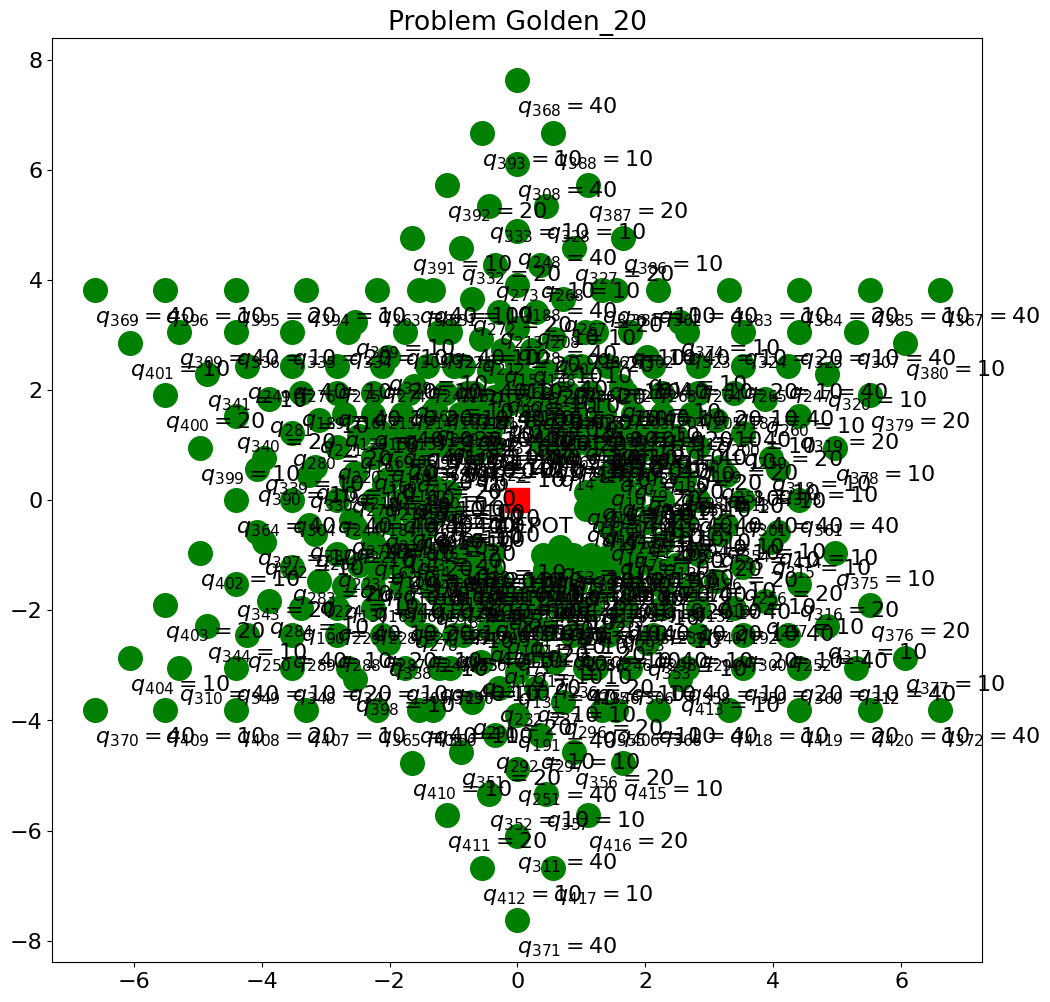

In [4]:
# Render the problem
instance_name = INSTANCE.split('/')[-1]
DisplayModel.render_problem(nodes, demands, matrix_coords, instance_name)

In [5]:
# Run the algorithm

bwacs = BWACS(**parameters_ants)
global_best_solution, best_solutions = bwacs.run()


PARAMETERS:
	alpha: 1
	ants_num: 210
	beta: 3
	k_optimal: 38
	max_capacity: 200
	max_iterations: 400
	p: 0.2
	q0: 0.9
	tare: 30.0
	type_candidate_nodes: None
	type_probabilities_matrix: normal




Global Best: 2597.48323:   0%|          | 2/400 [00:03<13:07,  1.98s/it]


	> Iteration results: BEST(2655.4415014217316), WORST(3105.757611916396), LS(2597.4832334604403)
	                     MED(2840.231526968011), AVG(2845.069909714572), STD(85.64768393570672)



Global Best: 2471.53701:   1%|          | 3/400 [00:07<18:37,  2.81s/it]


	> Iteration results: BEST(2510.3622024161295), WORST(2903.5622484255887), LS(2471.537014396558)
	                     MED(2734.244755337216), AVG(2741.340114685067), STD(72.46629868562215)



Global Best: 2462.84680:   1%|          | 4/400 [00:11<21:26,  3.25s/it]


	> Iteration results: BEST(2503.3504248389872), WORST(2919.7296165930948), LS(2462.8468036811087)
	                     MED(2710.5614486504014), AVG(2717.093327605884), STD(72.44421361111641)



Global Best: 2462.84680:   1%|▏         | 5/400 [00:15<22:59,  3.49s/it]


	> Iteration results: BEST(2555.0799502052123), WORST(2938.5044935471346), LS(2506.0855602607535)
	                     MED(2698.645817427173), AVG(2703.99995016601), STD(68.36744051182733)



Global Best: 2462.84680:   2%|▏         | 6/400 [00:19<24:18,  3.70s/it]


	> Iteration results: BEST(2510.27075231644), WORST(2902.319497690849), LS(2490.716361108568)
	                     MED(2682.99156827538), AVG(2683.8513638721383), STD(69.03118151595227)



Global Best: 2462.84680:   2%|▏         | 7/400 [00:24<24:57,  3.81s/it]


	> Iteration results: BEST(2507.534033071053), WORST(2871.5058931715857), LS(2465.949028896284)
	                     MED(2684.272811283573), AVG(2684.6184488354834), STD(68.9623377932215)



Global Best: 2454.47550:   2%|▏         | 8/400 [00:28<25:22,  3.88s/it]


	> Iteration results: BEST(2486.4857356402754), WORST(2903.6710677915153), LS(2454.475498616325)
	                     MED(2669.339039007412), AVG(2671.0656477995417), STD(66.91773303605834)



Global Best: 2454.47550:   2%|▏         | 9/400 [00:32<25:53,  3.97s/it]


	> Iteration results: BEST(2491.451769951053), WORST(2909.517139677652), LS(2466.0300914642357)
	                     MED(2646.588692017578), AVG(2650.164118781962), STD(70.56112005451382)



Global Best: 2444.12810:   2%|▎         | 10/400 [00:36<26:07,  4.02s/it]


	> Iteration results: BEST(2474.512641923185), WORST(2814.692533234952), LS(2444.128095082985)
	                     MED(2633.098733042885), AVG(2634.6488728212416), STD(69.45497196469327)



Global Best: 2432.69220:   3%|▎         | 11/400 [00:40<26:12,  4.04s/it]


	> Iteration results: BEST(2459.8040673228743), WORST(2828.711049478461), LS(2432.6921970177114)
	                     MED(2620.037048012916), AVG(2625.4083988175794), STD(68.36359032524638)



Global Best: 2366.34745:   3%|▎         | 12/400 [00:44<26:14,  4.06s/it]


	> Iteration results: BEST(2406.268600277013), WORST(2855.1943606328314), LS(2366.34744504186)
	                     MED(2636.9499150772626), AVG(2635.245012048776), STD(74.3146228952838)



Global Best: 2366.34745:   3%|▎         | 13/400 [00:48<26:12,  4.06s/it]


	> Iteration results: BEST(2472.9883065173144), WORST(2880.3602231281825), LS(2441.407532325521)
	                     MED(2631.9294321662564), AVG(2637.6625850280084), STD(72.27046646833763)



Global Best: 2366.34745:   4%|▎         | 14/400 [00:52<26:09,  4.07s/it]


	> Iteration results: BEST(2412.438586056261), WORST(2852.985727494195), LS(2373.8001226607594)
	                     MED(2618.597316178195), AVG(2618.2475750495646), STD(75.60308609643737)



Global Best: 2366.34745:   4%|▍         | 15/400 [00:56<26:06,  4.07s/it]


	> Iteration results: BEST(2419.727420951793), WORST(2808.8328108877563), LS(2403.8630541446564)
	                     MED(2610.5268531167667), AVG(2608.73235103881), STD(68.54565312559815)



Global Best: 2364.04965:   4%|▍         | 16/400 [01:00<26:05,  4.08s/it]


	> Iteration results: BEST(2421.4569558818766), WORST(2790.959265626556), LS(2364.0496545857973)
	                     MED(2590.937978302789), AVG(2600.5830729318495), STD(69.12592644094667)



Global Best: 2358.11077:   4%|▍         | 17/400 [01:05<26:07,  4.09s/it]


	> Iteration results: BEST(2386.6488151621816), WORST(2804.7262804176544), LS(2358.110774258634)
	                     MED(2585.2009088792684), AVG(2588.7829025014425), STD(73.22749442565654)



Global Best: 2358.11077:   4%|▍         | 18/400 [01:09<26:04,  4.10s/it]


	> Iteration results: BEST(2419.1429963395162), WORST(2810.7709176030967), LS(2399.919546363813)
	                     MED(2572.1665851277903), AVG(2574.7952101188544), STD(65.98403343952437)



Global Best: 2358.11077:   5%|▍         | 19/400 [01:13<25:57,  4.09s/it]


	> Iteration results: BEST(2406.9032147160615), WORST(2743.648700167067), LS(2387.9904091890407)
	                     MED(2563.490209314725), AVG(2566.4380728743727), STD(68.61989905255983)



Global Best: 2335.23031:   5%|▌         | 20/400 [01:17<25:53,  4.09s/it]


	> Iteration results: BEST(2345.2071319010083), WORST(2743.732108380292), LS(2335.2303064246203)
	                     MED(2557.183782704758), AVG(2555.009036824729), STD(73.74121597483747)



Global Best: 2335.23031:   5%|▌         | 21/400 [01:21<25:48,  4.09s/it]


	> Iteration results: BEST(2396.472779642187), WORST(2735.348415755753), LS(2373.388472371229)
	                     MED(2553.9940307359366), AVG(2553.4838417384467), STD(63.07430782007805)



Global Best: 2335.23031:   6%|▌         | 22/400 [01:25<25:52,  4.11s/it]


	> Iteration results: BEST(2382.341560257146), WORST(2757.4710867331028), LS(2350.0982764263013)
	                     MED(2545.680482277384), AVG(2548.056162452394), STD(63.192836495497865)



Global Best: 2326.55637:   6%|▌         | 23/400 [01:29<25:47,  4.10s/it]


	> Iteration results: BEST(2340.9525479441163), WORST(2736.183965158923), LS(2326.556367222728)
	                     MED(2533.489453228274), AVG(2535.6774203955965), STD(66.59720369081937)



Global Best: 2326.55637:   6%|▌         | 24/400 [01:33<25:40,  4.10s/it]


	> Iteration results: BEST(2338.8877327489226), WORST(2736.592339399765), LS(2334.029449685835)
	                     MED(2511.2152804529796), AVG(2517.6651687512367), STD(67.58946656848246)



Global Best: 2326.55637:   6%|▋         | 25/400 [01:37<25:35,  4.09s/it]


	> Iteration results: BEST(2356.957882794566), WORST(2690.010876393008), LS(2333.972874768096)
	                     MED(2503.4511562133066), AVG(2508.573418543529), STD(67.18589334793178)



Global Best: 2326.55637:   6%|▋         | 26/400 [01:41<25:27,  4.09s/it]


	> Iteration results: BEST(2363.7414167301677), WORST(2735.570531979735), LS(2340.568427889699)
	                     MED(2491.7936531456276), AVG(2501.2821388645), STD(67.39778488381825)



Global Best: 2326.55637:   7%|▋         | 27/400 [01:45<25:23,  4.08s/it]


	> Iteration results: BEST(2378.279534861428), WORST(2684.1972057992916), LS(2345.2645512305003)
	                     MED(2492.5377138015065), AVG(2495.19978665106), STD(58.407987373666316)



Global Best: 2326.55637:   7%|▋         | 28/400 [01:50<25:39,  4.14s/it]


	> Iteration results: BEST(2362.222676786608), WORST(2749.819281452361), LS(2355.053023414012)
	                     MED(2479.8861042181034), AVG(2482.4560250915824), STD(63.9899725114403)



Global Best: 2304.29431:   7%|▋         | 29/400 [01:54<25:43,  4.16s/it]


	> Iteration results: BEST(2316.335234887282), WORST(2661.275967449344), LS(2304.294306157514)
	                     MED(2474.4729120526204), AVG(2478.5399445886746), STD(61.50776436149209)



Global Best: 2304.29431:   8%|▊         | 30/400 [01:58<25:40,  4.16s/it]


	> Iteration results: BEST(2327.175521007038), WORST(2656.5780097038714), LS(2310.2396165339183)
	                     MED(2464.338212330806), AVG(2465.694141960444), STD(62.66333536894135)



Global Best: 2283.22842:   8%|▊         | 31/400 [02:02<25:34,  4.16s/it]


	> Iteration results: BEST(2295.592613925543), WORST(2686.8397469943066), LS(2283.228421539752)
	                     MED(2459.321235954193), AVG(2467.224546080586), STD(66.41107053755914)



Global Best: 2283.22842:   8%|▊         | 32/400 [02:06<25:27,  4.15s/it]


	> Iteration results: BEST(2332.0316207401484), WORST(2648.415037111232), LS(2322.0093033009375)
	                     MED(2458.0835004279124), AVG(2460.3710131010307), STD(55.88728683108393)



Global Best: 2283.22842:   8%|▊         | 33/400 [02:10<25:20,  4.14s/it]


	> Iteration results: BEST(2314.0507892630926), WORST(2629.7064319790497), LS(2294.123860589419)
	                     MED(2451.418203978441), AVG(2453.3870913336177), STD(58.43580901183482)



Global Best: 2283.22842:   8%|▊         | 34/400 [02:15<25:18,  4.15s/it]


	> Iteration results: BEST(2306.0239712012863), WORST(2637.037724421892), LS(2293.8847112611697)
	                     MED(2444.614337370169), AVG(2447.0995534668696), STD(61.0972463662681)



Global Best: 2261.66555:   9%|▉         | 35/400 [02:19<25:17,  4.16s/it]


	> Iteration results: BEST(2263.879142894976), WORST(2585.7516889658345), LS(2261.6655511345025)
	                     MED(2425.262851647774), AVG(2427.210691210396), STD(65.06984744105789)



Global Best: 2255.56386:   9%|▉         | 36/400 [02:23<25:14,  4.16s/it]


	> Iteration results: BEST(2265.8382635758244), WORST(2615.099874023384), LS(2255.5638585607335)
	                     MED(2425.4244601534433), AVG(2434.327104022979), STD(73.79721643178586)



Global Best: 2255.56386:   9%|▉         | 37/400 [02:27<25:14,  4.17s/it]


	> Iteration results: BEST(2276.3827261702822), WORST(2623.885835256829), LS(2267.0939866489507)
	                     MED(2409.039271766653), AVG(2414.226342127445), STD(67.94071345828272)



Global Best: 2255.56386:  10%|▉         | 38/400 [02:31<25:08,  4.17s/it]


	> Iteration results: BEST(2261.152281850228), WORST(2566.699897762082), LS(2259.8863527443605)
	                     MED(2397.407589839287), AVG(2400.512241648206), STD(65.2878478442276)



Global Best: 2255.56386:  10%|▉         | 39/400 [02:36<25:16,  4.20s/it]


	> Iteration results: BEST(2260.2659151648377), WORST(2614.847647044638), LS(2256.4687297792566)
	                     MED(2404.5815951802274), AVG(2407.384492784409), STD(69.82766426095206)

	* Stagnation detected!!!


Global Best: 2255.56386:  10%|█         | 40/400 [02:40<25:08,  4.19s/it]


	> Iteration results: BEST(2575.472749898501), WORST(3038.926602494671), LS(2519.8687768241716)
	                     MED(2786.4080062968396), AVG(2797.2795746131555), STD(80.97672506168189)



Global Best: 2255.56386:  10%|█         | 41/400 [02:44<25:02,  4.19s/it]


	> Iteration results: BEST(2388.8948264370456), WORST(2808.632732961866), LS(2353.6809539664278)
	                     MED(2567.7759255416368), AVG(2573.086898321972), STD(76.63150112668455)



Global Best: 2255.56386:  10%|█         | 42/400 [02:48<24:57,  4.18s/it]


	> Iteration results: BEST(2358.3143413251787), WORST(2734.954071927177), LS(2326.372291053917)
	                     MED(2528.6097750192303), AVG(2528.994950414182), STD(77.52217054206072)



Global Best: 2255.56386:  11%|█         | 43/400 [02:52<24:57,  4.19s/it]


	> Iteration results: BEST(2300.727476330669), WORST(2724.7429870510923), LS(2293.000849600148)
	                     MED(2491.8447166149363), AVG(2498.8755473568394), STD(82.10857760524009)



Global Best: 2255.56386:  11%|█         | 44/400 [02:57<24:52,  4.19s/it]


	> Iteration results: BEST(2306.6871742311787), WORST(2756.753310699195), LS(2292.408630144519)
	                     MED(2471.748646646712), AVG(2479.7520252497893), STD(89.8606023574276)



Global Best: 2255.56386:  11%|█▏        | 45/400 [03:01<24:49,  4.20s/it]


	> Iteration results: BEST(2280.7538122801775), WORST(2765.020522945731), LS(2265.6426686277227)
	                     MED(2438.9720704856145), AVG(2455.0072087001586), STD(82.8647920543416)



Global Best: 2253.94795:  12%|█▏        | 46/400 [03:05<24:47,  4.20s/it]


	> Iteration results: BEST(2255.5638585607326), WORST(2726.8160238923642), LS(2253.9479470274955)
	                     MED(2429.296682446454), AVG(2436.7783746318446), STD(91.95946897666369)



Global Best: 2250.25550:  12%|█▏        | 47/400 [03:09<24:53,  4.23s/it]


	> Iteration results: BEST(2255.010601658766), WORST(2651.445615897453), LS(2250.255502560451)
	                     MED(2432.611742586134), AVG(2439.4209406013865), STD(81.54992385552339)

	* Stagnation detected!!!


Global Best: 2250.25550:  12%|█▏        | 48/400 [03:13<24:43,  4.22s/it]


	> Iteration results: BEST(2596.1729674691314), WORST(3075.420028320889), LS(2560.1204875562207)
	                     MED(2802.874133290881), AVG(2801.334756796114), STD(72.6965654275802)



Global Best: 2250.25550:  12%|█▏        | 49/400 [03:18<24:39,  4.21s/it]


	> Iteration results: BEST(2381.320554119958), WORST(2805.3502174986997), LS(2375.378042528052)
	                     MED(2575.746733119595), AVG(2580.9647867671024), STD(75.88716738970328)



Global Best: 2250.25550:  12%|█▎        | 50/400 [03:22<24:38,  4.22s/it]


	> Iteration results: BEST(2334.6376301426158), WORST(2850.0162351174154), LS(2320.0081944227395)
	                     MED(2531.2316204345107), AVG(2536.894191516783), STD(81.90285373912567)



Global Best: 2250.25550:  13%|█▎        | 51/400 [03:26<24:31,  4.22s/it]


	> Iteration results: BEST(2312.109185659865), WORST(2749.0302779103495), LS(2300.5641666952615)
	                     MED(2509.6617977594533), AVG(2515.460136582096), STD(79.00980143548522)



Global Best: 2250.25550:  13%|█▎        | 52/400 [03:30<24:26,  4.21s/it]


	> Iteration results: BEST(2265.4113712780836), WORST(2727.547193511915), LS(2253.446974130883)
	                     MED(2479.561084746343), AVG(2486.051650317699), STD(81.14426085863889)



Global Best: 2250.25550:  13%|█▎        | 53/400 [03:34<24:17,  4.20s/it]


	> Iteration results: BEST(2276.7907611308196), WORST(2714.5314089118856), LS(2272.7376343909295)
	                     MED(2463.170837258852), AVG(2472.0807434694184), STD(83.95866226457208)



Global Best: 2248.95203:  14%|█▎        | 54/400 [03:39<24:09,  4.19s/it]


	> Iteration results: BEST(2251.1237757583194), WORST(2691.1008518474823), LS(2248.9520272686646)
	                     MED(2453.7474567634445), AVG(2452.94563811731), STD(88.63695632379219)



Global Best: 2240.17644:  14%|█▍        | 55/400 [03:43<24:09,  4.20s/it]


	> Iteration results: BEST(2255.9386614667155), WORST(2640.8615135321384), LS(2240.1764426175423)
	                     MED(2439.27820713592), AVG(2439.425307746627), STD(79.09460263962112)



Global Best: 2240.17644:  14%|█▍        | 56/400 [03:47<24:01,  4.19s/it]


	> Iteration results: BEST(2269.91297313097), WORST(2776.931141055569), LS(2260.3292293478194)
	                     MED(2452.4249053251206), AVG(2459.6359437147403), STD(78.25037770372855)



Global Best: 2240.17644:  14%|█▍        | 57/400 [03:51<23:57,  4.19s/it]


	> Iteration results: BEST(2276.3487847446877), WORST(2671.153522014883), LS(2269.1016132637023)
	                     MED(2425.304340038664), AVG(2427.0356949889065), STD(80.75273172144698)



Global Best: 2240.17644:  14%|█▍        | 58/400 [03:55<23:56,  4.20s/it]


	> Iteration results: BEST(2249.8576939452837), WORST(2579.994166296169), LS(2246.4000677799672)
	                     MED(2409.272331744181), AVG(2409.176456201394), STD(72.7101871169383)

	* Stagnation detected!!!


Global Best: 2240.17644:  15%|█▍        | 59/400 [04:00<23:53,  4.20s/it]


	> Iteration results: BEST(2624.717392803735), WORST(2970.004055192072), LS(2533.136132585681)
	                     MED(2796.9514593229387), AVG(2797.0756493921635), STD(74.5310572692221)



Global Best: 2240.17644:  15%|█▌        | 60/400 [04:04<23:48,  4.20s/it]


	> Iteration results: BEST(2417.205134043455), WORST(2794.839428718329), LS(2406.514983491459)
	                     MED(2567.2058498480924), AVG(2574.749581612335), STD(75.55039804073513)



Global Best: 2240.17644:  15%|█▌        | 61/400 [04:08<23:49,  4.22s/it]


	> Iteration results: BEST(2296.8914543285196), WORST(2794.1367983699197), LS(2286.4259551960145)
	                     MED(2522.4108193787397), AVG(2528.8114327320363), STD(83.49497179144126)



Global Best: 2240.17644:  16%|█▌        | 62/400 [04:12<23:41,  4.20s/it]


	> Iteration results: BEST(2286.743841200026), WORST(2710.4374362683798), LS(2265.150564012271)
	                     MED(2485.0479153845954), AVG(2485.281903642743), STD(84.40335494781617)



Global Best: 2240.17644:  16%|█▌        | 63/400 [04:16<23:37,  4.20s/it]


	> Iteration results: BEST(2279.970985195325), WORST(2842.7471293125545), LS(2278.917266292014)
	                     MED(2484.5581963265963), AVG(2478.560855440052), STD(88.16029538389861)



Global Best: 2229.64225:  16%|█▌        | 64/400 [04:21<23:36,  4.22s/it]


	> Iteration results: BEST(2240.176442617542), WORST(2699.267124253687), LS(2229.6422461455936)
	                     MED(2437.3311938563575), AVG(2448.304495876885), STD(90.66061939263855)



Global Best: 2229.64225:  16%|█▋        | 65/400 [04:25<23:32,  4.22s/it]


	> Iteration results: BEST(2256.0005745464787), WORST(2749.018537396711), LS(2244.3070919090164)
	                     MED(2433.243406613291), AVG(2442.6942610018596), STD(89.99004460603457)



Global Best: 2229.64225:  16%|█▋        | 66/400 [04:29<23:29,  4.22s/it]


	> Iteration results: BEST(2255.3807595423223), WORST(2781.2805861082093), LS(2241.8555568092775)
	                     MED(2427.7902403282446), AVG(2438.026092066982), STD(99.46120483467516)



Global Best: 2229.64225:  17%|█▋        | 67/400 [04:33<23:23,  4.22s/it]


	> Iteration results: BEST(2237.189880155032), WORST(2712.7799199991296), LS(2236.1741393641337)
	                     MED(2409.405621937717), AVG(2414.163942982099), STD(94.58376006393875)



Global Best: 2224.74838:  17%|█▋        | 68/400 [04:38<23:18,  4.21s/it]


	> Iteration results: BEST(2230.2784865884933), WORST(2705.449326266394), LS(2224.7483754100867)
	                     MED(2404.7340772235457), AVG(2409.780179729188), STD(87.30342478765394)



Global Best: 2224.74838:  17%|█▋        | 69/400 [04:42<23:12,  4.21s/it]


	> Iteration results: BEST(2229.3152406683803), WORST(2607.834102914084), LS(2226.2574905032047)
	                     MED(2377.3020120564097), AVG(2379.445793300745), STD(84.48305959885157)



Global Best: 2218.64179:  18%|█▊        | 70/400 [04:46<23:10,  4.21s/it]


	> Iteration results: BEST(2218.785352266348), WORST(2628.510627084352), LS(2218.6417855666014)
	                     MED(2356.894660893274), AVG(2371.4381175821204), STD(87.54580014108758)



Global Best: 2214.90902:  18%|█▊        | 71/400 [04:50<23:08,  4.22s/it]


	> Iteration results: BEST(2217.9105188780595), WORST(2642.632392163637), LS(2214.909016696844)
	                     MED(2333.688887293618), AVG(2344.2739515830494), STD(85.64295470825468)



Global Best: 2211.39510:  18%|█▊        | 72/400 [04:55<23:08,  4.23s/it]


	> Iteration results: BEST(2216.4876989977943), WORST(2620.536848026614), LS(2211.395098289618)
	                     MED(2324.333927097046), AVG(2346.451677370943), STD(87.79790388371522)



Global Best: 2210.26379:  18%|█▊        | 73/400 [04:59<23:04,  4.23s/it]


	> Iteration results: BEST(2212.169162768239), WORST(2673.9639179540704), LS(2210.263785615389)
	                     MED(2317.7221734784794), AVG(2338.043585285854), STD(86.26045717442773)



Global Best: 2210.02843:  18%|█▊        | 74/400 [05:03<22:55,  4.22s/it]


	> Iteration results: BEST(2211.5525033290337), WORST(2620.043477027076), LS(2210.0284280453952)
	                     MED(2313.1888830388507), AVG(2336.441655797663), STD(89.02705497895994)



Global Best: 2207.17508:  19%|█▉        | 75/400 [05:07<22:49,  4.21s/it]


	> Iteration results: BEST(2209.6777884925423), WORST(2635.6511638241054), LS(2207.1750764962358)
	                     MED(2312.3223323117086), AVG(2328.7712689393306), STD(82.68692067410518)

	* Stagnation detected!!!


Global Best: 2207.17508:  19%|█▉        | 76/400 [05:11<22:45,  4.21s/it]


	> Iteration results: BEST(2628.3774505713914), WORST(3017.3007490897708), LS(2590.499613890343)
	                     MED(2796.8099964731773), AVG(2800.7550436514616), STD(77.1916362295904)



Global Best: 2207.17508:  19%|█▉        | 77/400 [05:16<22:38,  4.21s/it]


	> Iteration results: BEST(2376.2101025610723), WORST(2755.3371157683873), LS(2332.900527096736)
	                     MED(2556.393878565309), AVG(2556.6445643979123), STD(76.25421513455366)



Global Best: 2207.17508:  20%|█▉        | 78/400 [05:20<22:34,  4.21s/it]


	> Iteration results: BEST(2307.855340154671), WORST(2871.358201764602), LS(2304.9551236100897)
	                     MED(2512.6941531840203), AVG(2516.1089662452714), STD(89.14319059674467)



Global Best: 2207.17508:  20%|█▉        | 79/400 [05:24<22:34,  4.22s/it]


	> Iteration results: BEST(2276.9678378182575), WORST(2759.537999738585), LS(2275.856652741164)
	                     MED(2484.8391093344735), AVG(2481.6649098425673), STD(86.87705898015656)



Global Best: 2207.17508:  20%|██        | 80/400 [05:28<22:29,  4.22s/it]


	> Iteration results: BEST(2239.1790266964376), WORST(2735.686774432859), LS(2237.3620474678937)
	                     MED(2464.8633547425134), AVG(2472.7123987627347), STD(94.34136098339738)



Global Best: 2207.17508:  20%|██        | 81/400 [05:32<22:25,  4.22s/it]


	> Iteration results: BEST(2222.001659309883), WORST(2701.75452846955), LS(2221.2216226121645)
	                     MED(2442.6027260452847), AVG(2435.8081226979816), STD(95.20536227925662)



Global Best: 2206.54709:  20%|██        | 82/400 [05:37<22:20,  4.22s/it]


	> Iteration results: BEST(2207.1750764962358), WORST(2700.311931099468), LS(2206.5470896961606)
	                     MED(2421.4700926775795), AVG(2416.5711799364635), STD(91.06296070798312)



Global Best: 2205.62231:  21%|██        | 83/400 [05:41<22:20,  4.23s/it]


	> Iteration results: BEST(2206.665929018924), WORST(2678.5904362599917), LS(2205.6223131823185)
	                     MED(2389.738331332882), AVG(2399.4315434057708), STD(101.4020964420055)



Global Best: 2205.62231:  21%|██        | 84/400 [05:45<22:16,  4.23s/it]


	> Iteration results: BEST(2206.6659290189236), WORST(2721.5448717436707), LS(2205.7431404503373)
	                     MED(2368.5650724203015), AVG(2379.3693162933596), STD(92.54735755491701)



Global Best: 2205.62231:  21%|██▏       | 85/400 [05:49<22:15,  4.24s/it]


	> Iteration results: BEST(2218.779915561079), WORST(2603.394925959153), LS(2217.220014633051)
	                     MED(2370.8199790357794), AVG(2376.287755847356), STD(87.71981026386382)



Global Best: 2205.23606:  22%|██▏       | 86/400 [05:54<22:06,  4.23s/it]


	> Iteration results: BEST(2206.545101750904), WORST(2642.160995064153), LS(2205.2360624087532)
	                     MED(2359.877544223034), AVG(2368.5856995112545), STD(85.90386813347997)



Global Best: 2204.75791:  22%|██▏       | 87/400 [05:58<22:02,  4.22s/it]


	> Iteration results: BEST(2205.4191031215773), WORST(2627.123433892614), LS(2204.7579105115824)
	                     MED(2336.3249662055887), AVG(2344.1401595507205), STD(88.07970274993174)



Global Best: 2204.75791:  22%|██▏       | 88/400 [06:02<21:56,  4.22s/it]


	> Iteration results: BEST(2205.5600997375127), WORST(2727.689805864999), LS(2205.5600997375136)
	                     MED(2331.2212547892664), AVG(2344.9451063877036), STD(95.14694105890456)



Global Best: 2204.56621:  22%|██▏       | 89/400 [06:06<21:53,  4.22s/it]


	> Iteration results: BEST(2204.7579105115824), WORST(2637.4360568437282), LS(2204.5662066430345)
	                     MED(2320.532149482749), AVG(2330.113054577395), STD(82.59223058485472)



Global Best: 2204.10219:  22%|██▎       | 90/400 [06:10<21:49,  4.22s/it]


	> Iteration results: BEST(2205.3002637988143), WORST(2605.2680136253266), LS(2204.102189951372)
	                     MED(2300.3896533708075), AVG(2317.3108163275588), STD(83.42255549385918)



Global Best: 2203.51202:  23%|██▎       | 91/400 [06:15<21:45,  4.22s/it]


	> Iteration results: BEST(2204.4441187143925), WORST(2608.1271075928717), LS(2203.5120188227356)
	                     MED(2317.6983341145624), AVG(2329.5945941162067), STD(78.20307148771029)



Global Best: 2203.51202:  23%|██▎       | 92/400 [06:19<21:42,  4.23s/it]


	> Iteration results: BEST(2204.1169989829064), WORST(2612.5136623511935), LS(2203.815118947319)
	                     MED(2316.34088611295), AVG(2327.0108713290415), STD(80.6369931399499)

	* Stagnation detected!!!


Global Best: 2203.51202:  23%|██▎       | 93/400 [06:23<21:36,  4.22s/it]


	> Iteration results: BEST(2596.4918845331144), WORST(3014.487049272898), LS(2542.3432233088574)
	                     MED(2779.693176149765), AVG(2785.4069982113483), STD(72.09281923249155)



Global Best: 2203.51202:  24%|██▎       | 94/400 [06:27<21:42,  4.26s/it]


	> Iteration results: BEST(2338.108683328952), WORST(2861.3019720794523), LS(2326.304020128705)
	                     MED(2541.256028548795), AVG(2559.1998823363274), STD(89.38753138191421)



Global Best: 2203.51202:  24%|██▍       | 95/400 [06:32<21:35,  4.25s/it]


	> Iteration results: BEST(2275.484221685906), WORST(2724.702209943046), LS(2269.4518151459065)
	                     MED(2514.507262403321), AVG(2514.4049445682185), STD(78.26045529326097)



Global Best: 2203.51202:  24%|██▍       | 96/400 [06:36<21:27,  4.24s/it]


	> Iteration results: BEST(2258.0435223880463), WORST(2798.6329890736492), LS(2256.3190011316374)
	                     MED(2479.6781080959927), AVG(2485.1698300578246), STD(85.87337920575737)



Global Best: 2203.51202:  24%|██▍       | 97/400 [06:40<21:21,  4.23s/it]


	> Iteration results: BEST(2237.3647418723012), WORST(2698.2393015423086), LS(2233.882956319748)
	                     MED(2447.653187498602), AVG(2455.0606309063714), STD(96.34552405021795)



Global Best: 2203.51202:  24%|██▍       | 98/400 [06:44<21:15,  4.22s/it]


	> Iteration results: BEST(2233.8983688763547), WORST(2717.2230488662253), LS(2226.3736725311155)
	                     MED(2429.306638302984), AVG(2426.1424840626255), STD(91.07301589628129)



Global Best: 2203.51202:  25%|██▍       | 99/400 [06:49<21:09,  4.22s/it]


	> Iteration results: BEST(2203.5120188227356), WORST(2636.710204953929), LS(2203.5120188227356)
	                     MED(2401.1065268390266), AVG(2401.715223104711), STD(98.56797011260531)

	* Stagnation detected!!!


Global Best: 2203.51202:  25%|██▌       | 100/400 [06:53<21:04,  4.21s/it]


	> Iteration results: BEST(2638.641996303641), WORST(2991.4209061141737), LS(2579.3996602554907)
	                     MED(2796.597842058235), AVG(2797.737055166447), STD(75.97834085974604)



Global Best: 2203.51202:  25%|██▌       | 101/400 [06:57<21:00,  4.22s/it]


	> Iteration results: BEST(2369.5061220195744), WORST(2808.5151206243972), LS(2369.211628941045)
	                     MED(2562.416596037041), AVG(2559.7897579430637), STD(84.44299585432712)



Global Best: 2203.51202:  26%|██▌       | 102/400 [07:01<20:54,  4.21s/it]


	> Iteration results: BEST(2313.3996647192193), WORST(2749.8415840509606), LS(2299.723070023182)
	                     MED(2510.050827350352), AVG(2516.5292882966), STD(83.9765630176637)



Global Best: 2203.51202:  26%|██▌       | 103/400 [07:05<20:49,  4.21s/it]


	> Iteration results: BEST(2274.6316549608914), WORST(2843.829837199484), LS(2268.283102780375)
	                     MED(2473.9691756577986), AVG(2479.6243017869133), STD(88.3372839100437)



Global Best: 2203.51202:  26%|██▌       | 104/400 [07:10<20:46,  4.21s/it]


	> Iteration results: BEST(2238.7470646554516), WORST(2676.790975865591), LS(2238.7470646554516)
	                     MED(2434.18692835856), AVG(2442.302694352017), STD(89.95440602268677)



Global Best: 2203.51202:  26%|██▋       | 105/400 [07:14<20:45,  4.22s/it]


	> Iteration results: BEST(2203.5120188227356), WORST(2705.612570606354), LS(2203.5120188227356)
	                     MED(2418.497504699213), AVG(2427.084188771106), STD(92.42507569616632)



Global Best: 2203.51202:  26%|██▋       | 106/400 [07:18<20:43,  4.23s/it]


	> Iteration results: BEST(2205.0081662342614), WORST(2644.90704614805), LS(2204.0162610698476)
	                     MED(2401.16475359838), AVG(2414.1674909537714), STD(97.1325230684287)



Global Best: 2203.51202:  27%|██▋       | 107/400 [07:22<20:50,  4.27s/it]


	> Iteration results: BEST(2203.5120188227356), WORST(2643.8460570213206), LS(2203.5120188227356)
	                     MED(2371.879218053755), AVG(2380.9559903722634), STD(86.70560260609689)



Global Best: 2203.24659:  27%|██▋       | 108/400 [07:27<20:32,  4.22s/it]


	> Iteration results: BEST(2203.512018822735), WORST(2583.264134939519), LS(2203.2465902691606)
	                     MED(2363.334815362003), AVG(2369.883339241904), STD(87.38965898254062)



Global Best: 2202.85059:  27%|██▋       | 109/400 [07:31<20:25,  4.21s/it]


	> Iteration results: BEST(2203.5120188227356), WORST(2678.4118078627894), LS(2202.850594985592)
	                     MED(2357.2197298741476), AVG(2368.0953862641677), STD(94.29557900804248)



Global Best: 2202.66755:  28%|██▊       | 110/400 [07:35<20:10,  4.17s/it]


	> Iteration results: BEST(2202.8505949855917), WORST(2656.670664920182), LS(2202.6675542727676)
	                     MED(2335.3038096674245), AVG(2345.5276513352223), STD(93.72482812584599)



Global Best: 2200.14430:  28%|██▊       | 111/400 [07:39<20:12,  4.19s/it]


	> Iteration results: BEST(2202.667554272768), WORST(2652.7916329540444), LS(2200.1442990258392)
	                     MED(2325.3766728589035), AVG(2340.3852323510187), STD(89.04141359916291)



Global Best: 2199.59359:  28%|██▊       | 112/400 [07:43<20:01,  4.17s/it]


	> Iteration results: BEST(2200.336863033629), WORST(2643.352935482142), LS(2199.593594667769)
	                     MED(2328.2948222087684), AVG(2339.984825053614), STD(83.6476720429552)



Global Best: 2199.59359:  28%|██▊       | 113/400 [07:47<19:55,  4.17s/it]


	> Iteration results: BEST(2200.3368630336295), WORST(2599.324994015885), LS(2199.8861334780117)
	                     MED(2299.5061175070527), AVG(2320.0005760913714), STD(81.40403366149637)

	* Stagnation detected!!!


Global Best: 2199.59359:  28%|██▊       | 114/400 [07:51<19:51,  4.17s/it]


	> Iteration results: BEST(2609.808288852217), WORST(3027.330725831501), LS(2572.2158836026233)
	                     MED(2801.7824214054917), AVG(2800.578155086947), STD(77.45617562349277)



Global Best: 2199.59359:  29%|██▉       | 115/400 [07:56<19:46,  4.16s/it]


	> Iteration results: BEST(2348.496830243773), WORST(2754.9529282873214), LS(2339.7417682140936)
	                     MED(2563.7170687464854), AVG(2572.349282379558), STD(77.46560654641195)



Global Best: 2199.59359:  29%|██▉       | 116/400 [08:00<19:45,  4.17s/it]


	> Iteration results: BEST(2309.4535928638493), WORST(2775.3070969125097), LS(2302.3416741533238)
	                     MED(2510.0624169725625), AVG(2516.7554487347065), STD(81.95245707101228)



Global Best: 2199.59359:  29%|██▉       | 117/400 [08:04<19:39,  4.17s/it]


	> Iteration results: BEST(2269.0216541319096), WORST(2750.6405329476847), LS(2263.857082133475)
	                     MED(2476.7261908770424), AVG(2478.5926280061726), STD(94.56021955959966)



Global Best: 2199.59359:  30%|██▉       | 118/400 [08:08<19:31,  4.15s/it]


	> Iteration results: BEST(2220.073937408748), WORST(2685.4055626912773), LS(2219.1900789894685)
	                     MED(2461.441089188884), AVG(2455.6778073502023), STD(91.50955850072717)



Global Best: 2199.59359:  30%|██▉       | 119/400 [08:12<19:26,  4.15s/it]


	> Iteration results: BEST(2199.5935946677687), WORST(2631.8222120166024), LS(2199.593594667769)
	                     MED(2417.677336189026), AVG(2414.7010163961254), STD(88.85745596516564)



Global Best: 2199.59359:  30%|███       | 120/400 [08:16<19:20,  4.15s/it]


	> Iteration results: BEST(2199.5935946677687), WORST(2707.1955219880365), LS(2199.5935946677687)
	                     MED(2399.624951835539), AVG(2411.101224816106), STD(89.85311178802877)



Global Best: 2199.59359:  30%|███       | 121/400 [08:21<19:17,  4.15s/it]


	> Iteration results: BEST(2199.5935946677687), WORST(2674.423584591008), LS(2199.5935946677687)
	                     MED(2401.1287331039184), AVG(2402.070433465029), STD(102.1736221231163)



Global Best: 2198.95030:  30%|███       | 122/400 [08:25<19:11,  4.14s/it]


	> Iteration results: BEST(2199.593594667769), WORST(2700.2781054985826), LS(2198.9503011043616)
	                     MED(2371.5124668163053), AVG(2380.1659999403837), STD(101.59278013706862)



Global Best: 2198.95030:  31%|███       | 123/400 [08:29<19:05,  4.13s/it]


	> Iteration results: BEST(2199.1428651121514), WORST(2683.161544456664), LS(2199.1428651121514)
	                     MED(2354.4166364986277), AVG(2366.7158970432865), STD(93.575773602794)



Global Best: 2198.48167:  31%|███       | 124/400 [08:33<18:59,  4.13s/it]


	> Iteration results: BEST(2199.142865112151), WORST(2644.9386310408418), LS(2198.4816725021565)
	                     MED(2349.919324402408), AVG(2359.7224263256085), STD(92.2288749696238)



Global Best: 2198.48167:  31%|███▏      | 125/400 [08:37<18:54,  4.12s/it]


	> Iteration results: BEST(2198.4816725021565), WORST(2639.2351767774626), LS(2198.4816725021565)
	                     MED(2325.4811491216765), AVG(2340.9314375218514), STD(90.23458314613829)



Global Best: 2198.48167:  32%|███▏      | 126/400 [08:41<18:51,  4.13s/it]


	> Iteration results: BEST(2198.481672502156), WORST(2647.373730746177), LS(2198.481672502156)
	                     MED(2314.3460661779422), AVG(2325.0036207153157), STD(86.99185795801361)

	* Stagnation detected!!!


Global Best: 2198.48167:  32%|███▏      | 127/400 [08:45<18:48,  4.13s/it]


	> Iteration results: BEST(2612.6775272699015), WORST(2975.8691004224183), LS(2582.7929007326557)
	                     MED(2793.3047482876987), AVG(2796.17963028559), STD(76.2070658833148)



Global Best: 2198.48167:  32%|███▏      | 128/400 [08:49<18:40,  4.12s/it]


	> Iteration results: BEST(2380.4122148772462), WORST(2791.7461285202626), LS(2341.416649476169)
	                     MED(2561.727761149614), AVG(2564.6455286549826), STD(77.45915531252473)



Global Best: 2198.48167:  32%|███▏      | 129/400 [08:53<18:33,  4.11s/it]


	> Iteration results: BEST(2316.0920191415466), WORST(2789.663709630551), LS(2299.292073959075)
	                     MED(2515.1375492707944), AVG(2519.7923079818966), STD(86.7979775079737)



Global Best: 2198.48167:  32%|███▎      | 130/400 [08:58<18:28,  4.11s/it]


	> Iteration results: BEST(2247.4480751326787), WORST(2783.995530383499), LS(2243.699570172092)
	                     MED(2481.206921372229), AVG(2481.4910099655335), STD(87.62641870480968)



Global Best: 2198.48167:  33%|███▎      | 131/400 [09:02<18:22,  4.10s/it]


	> Iteration results: BEST(2234.8008731556483), WORST(2762.8601145472694), LS(2223.366286715159)
	                     MED(2461.7013853084904), AVG(2467.813920291347), STD(88.91673210848374)



Global Best: 2197.26657:  33%|███▎      | 132/400 [09:06<18:22,  4.11s/it]


	> Iteration results: BEST(2198.4816725021565), WORST(2724.7242886857643), LS(2197.266574019453)
	                     MED(2433.876113693378), AVG(2431.7927529760614), STD(99.38277881707786)



Global Best: 2197.26657:  33%|███▎      | 133/400 [09:10<18:21,  4.12s/it]


	> Iteration results: BEST(2198.481672502157), WORST(2698.486798701618), LS(2197.266574019454)
	                     MED(2408.0155285372575), AVG(2409.5067047995776), STD(98.81197841896686)



Global Best: 2193.11304:  34%|███▎      | 134/400 [09:14<18:16,  4.12s/it]


	> Iteration results: BEST(2197.266574019453), WORST(2683.364011780088), LS(2193.113040850954)
	                     MED(2372.523963489679), AVG(2379.6631233977646), STD(90.57736425829559)



Global Best: 2193.11304:  34%|███▍      | 135/400 [09:18<18:13,  4.13s/it]


	> Iteration results: BEST(2201.087551027479), WORST(2593.8853393591576), LS(2197.1900714872736)
	                     MED(2372.8322401836094), AVG(2371.6273804644584), STD(78.96976295689072)



Global Best: 2193.11304:  34%|███▍      | 136/400 [09:22<18:10,  4.13s/it]


	> Iteration results: BEST(2193.4549696139743), WORST(2702.35133578619), LS(2193.4549696139743)
	                     MED(2367.3738804588497), AVG(2377.2791577844405), STD(99.57639614703683)



Global Best: 2193.11304:  34%|███▍      | 137/400 [09:26<18:03,  4.12s/it]


	> Iteration results: BEST(2193.9410817826265), WORST(2632.156890212034), LS(2193.9410817826265)
	                     MED(2349.9338727943523), AVG(2354.2618657110525), STD(87.37110374289477)



Global Best: 2192.85851:  34%|███▍      | 138/400 [09:31<18:04,  4.14s/it]


	> Iteration results: BEST(2193.454969613974), WORST(2603.1822867623555), LS(2192.8585147372214)
	                     MED(2325.469530081431), AVG(2341.6823541222425), STD(95.67068203858189)



Global Best: 2192.85851:  35%|███▍      | 139/400 [09:35<17:56,  4.12s/it]


	> Iteration results: BEST(2193.123943290796), WORST(2671.892613999991), LS(2193.1239432907964)
	                     MED(2332.9691320178163), AVG(2343.8888776213525), STD(94.74675755398125)



Global Best: 2192.31006:  35%|███▌      | 140/400 [09:39<17:49,  4.12s/it]


	> Iteration results: BEST(2193.1239432907964), WORST(2571.702146410619), LS(2192.3100616764673)
	                     MED(2327.9509881424583), AVG(2338.394220454618), STD(88.92132027428845)



Global Best: 2192.31006:  35%|███▌      | 141/400 [09:43<17:44,  4.11s/it]


	> Iteration results: BEST(2193.4549696139748), WORST(2590.664260950796), LS(2193.4549696139748)
	                     MED(2340.5678020344913), AVG(2345.0994255127844), STD(88.90064357175262)

	* Stagnation detected!!!


Global Best: 2192.31006:  36%|███▌      | 142/400 [09:47<17:38,  4.10s/it]


	> Iteration results: BEST(2588.347024367369), WORST(3032.168548329245), LS(2527.4204250702765)
	                     MED(2795.1870344172153), AVG(2791.2008313457814), STD(74.35388141887776)



Global Best: 2192.31006:  36%|███▌      | 143/400 [09:51<17:31,  4.09s/it]


	> Iteration results: BEST(2414.5764467538), WORST(2754.293774972769), LS(2376.002963310569)
	                     MED(2569.2098479793276), AVG(2570.7359214178114), STD(71.39693661295095)



Global Best: 2192.31006:  36%|███▌      | 144/400 [09:55<17:28,  4.10s/it]


	> Iteration results: BEST(2273.3584180480407), WORST(2753.1421030697156), LS(2265.2499539525297)
	                     MED(2512.6561514453706), AVG(2513.2943105949334), STD(85.64530165821151)



Global Best: 2192.31006:  36%|███▋      | 145/400 [09:59<17:23,  4.09s/it]


	> Iteration results: BEST(2261.5056809453704), WORST(2747.093227097865), LS(2247.2362215507624)
	                     MED(2479.0076666294017), AVG(2474.938870123829), STD(89.63377270604622)



Global Best: 2192.31006:  36%|███▋      | 146/400 [10:03<17:24,  4.11s/it]


	> Iteration results: BEST(2210.2586882009523), WORST(2749.7033248280536), LS(2210.2586882009523)
	                     MED(2456.0930203488733), AVG(2454.0249754735423), STD(88.1827125004063)



Global Best: 2192.31006:  37%|███▋      | 147/400 [10:08<17:25,  4.13s/it]


	> Iteration results: BEST(2192.310061676467), WORST(2674.489959637285), LS(2192.310061676467)
	                     MED(2428.3628699535934), AVG(2427.903666940846), STD(86.44091764941865)



Global Best: 2192.31006:  37%|███▋      | 148/400 [10:12<17:24,  4.14s/it]


	> Iteration results: BEST(2192.310061676467), WORST(2774.411666318197), LS(2192.310061676467)
	                     MED(2395.2945694289415), AVG(2400.0682675428047), STD(94.79137728023802)



Global Best: 2192.31006:  37%|███▋      | 149/400 [10:16<17:20,  4.14s/it]


	> Iteration results: BEST(2192.3100616764673), WORST(2645.947302320294), LS(2192.3100616764673)
	                     MED(2378.346326472976), AVG(2384.7213395452704), STD(95.7004486673118)



Global Best: 2192.31006:  38%|███▊      | 150/400 [10:20<17:13,  4.13s/it]


	> Iteration results: BEST(2192.310061676467), WORST(2604.2540939462224), LS(2192.3100616764673)
	                     MED(2361.118325704849), AVG(2359.348962108418), STD(89.3253511544496)



Global Best: 2182.68096:  38%|███▊      | 151/400 [10:24<17:13,  4.15s/it]


	> Iteration results: BEST(2182.6809617449435), WORST(2576.7891909387854), LS(2182.6809617449435)
	                     MED(2329.5521216829857), AVG(2336.76641481025), STD(89.95732685447565)



Global Best: 2180.30704:  38%|███▊      | 152/400 [10:28<17:09,  4.15s/it]


	> Iteration results: BEST(2180.6489707627084), WORST(2536.5748373560027), LS(2180.3070419996875)
	                     MED(2290.7531505184734), AVG(2305.032771530892), STD(86.57340038383991)



Global Best: 2178.10429:  38%|███▊      | 153/400 [10:33<17:05,  4.15s/it]


	> Iteration results: BEST(2179.5661858037106), WORST(2571.3716675531123), LS(2178.104288548968)
	                     MED(2286.9641462275786), AVG(2293.710574984007), STD(80.89924187270837)



Global Best: 2178.10429:  38%|███▊      | 154/400 [10:37<17:00,  4.15s/it]


	> Iteration results: BEST(2178.3273779892247), WORST(2617.929176561634), LS(2178.259355549765)
	                     MED(2262.0224971828516), AVG(2288.228318787384), STD(91.75414460829806)



Global Best: 2174.32655:  39%|███▉      | 155/400 [10:41<17:02,  4.18s/it]


	> Iteration results: BEST(2178.1042885489674), WORST(2593.581213417635), LS(2174.326549854637)
	                     MED(2260.8801666932927), AVG(2284.4880355389823), STD(93.53996355220342)



Global Best: 2166.33789:  39%|███▉      | 156/400 [10:45<17:00,  4.18s/it]


	> Iteration results: BEST(2166.337890989172), WORST(2590.643962079179), LS(2166.3378909891726)
	                     MED(2236.7260025568366), AVG(2258.241249809694), STD(75.43045117265338)

	* Stagnation detected!!!


Global Best: 2166.33789:  39%|███▉      | 157/400 [10:49<16:52,  4.16s/it]


	> Iteration results: BEST(2577.4851967900213), WORST(3001.684432343743), LS(2547.0950929845962)
	                     MED(2793.4122835946364), AVG(2792.6431187501744), STD(81.88422890974643)



Global Best: 2166.33789:  40%|███▉      | 158/400 [10:53<16:45,  4.16s/it]


	> Iteration results: BEST(2349.2789693358363), WORST(2817.0467205764444), LS(2326.322390578069)
	                     MED(2549.7116759785586), AVG(2544.7007157604885), STD(77.4137963753564)



Global Best: 2166.33789:  40%|███▉      | 159/400 [10:58<16:43,  4.16s/it]


	> Iteration results: BEST(2209.6889697445313), WORST(2775.5133809535587), LS(2207.977729661667)
	                     MED(2471.0860539668256), AVG(2477.66008970941), STD(100.02404354066671)



Global Best: 2166.33789:  40%|████      | 160/400 [11:02<16:40,  4.17s/it]


	> Iteration results: BEST(2214.0012092312013), WORST(2675.3693885572357), LS(2208.0170444464266)
	                     MED(2426.263203621636), AVG(2427.9319246662685), STD(88.24798707423945)



Global Best: 2166.33789:  40%|████      | 161/400 [11:06<16:35,  4.17s/it]


	> Iteration results: BEST(2188.5460687973946), WORST(2665.352903863059), LS(2186.7262653204907)
	                     MED(2392.851298466602), AVG(2401.96404827561), STD(94.45391088900847)



Global Best: 2166.33789:  40%|████      | 162/400 [11:10<16:32,  4.17s/it]


	> Iteration results: BEST(2182.729657473093), WORST(2678.7432766607276), LS(2182.729657473093)
	                     MED(2401.2512860332486), AVG(2397.640839733223), STD(92.57171632315286)



Global Best: 2166.33789:  41%|████      | 163/400 [11:14<16:26,  4.16s/it]


	> Iteration results: BEST(2185.7708108637753), WORST(2679.4907307509884), LS(2183.767837118277)
	                     MED(2357.1933156942077), AVG(2363.5995894280186), STD(105.4760062839064)



Global Best: 2165.48853:  41%|████      | 164/400 [11:18<16:23,  4.17s/it]


	> Iteration results: BEST(2172.2766827612004), WORST(2602.4799544953275), LS(2165.488525576519)
	                     MED(2334.143058889699), AVG(2343.2384946297793), STD(97.49398458602442)



Global Best: 2165.48853:  41%|████▏     | 165/400 [11:23<16:18,  4.16s/it]


	> Iteration results: BEST(2166.337890989172), WORST(2606.6363000673196), LS(2166.3378909891726)
	                     MED(2315.2470757484352), AVG(2328.293172964565), STD(91.22254614742177)



Global Best: 2165.48853:  42%|████▏     | 166/400 [11:27<16:13,  4.16s/it]


	> Iteration results: BEST(2165.4885255765184), WORST(2723.235886409475), LS(2165.488525576519)
	                     MED(2289.8913418130737), AVG(2301.717410452937), STD(85.31560333192769)



Global Best: 2162.86458:  42%|████▏     | 167/400 [11:31<16:12,  4.17s/it]


	> Iteration results: BEST(2165.488525576519), WORST(2573.0296206476064), LS(2162.8645770826415)
	                     MED(2292.3272804687645), AVG(2303.2721709279544), STD(88.70509729390434)

	* Stagnation detected!!!


Global Best: 2162.86458:  42%|████▏     | 168/400 [11:35<16:06,  4.17s/it]


	> Iteration results: BEST(2605.0742762325995), WORST(3047.946671617175), LS(2555.5611809977236)
	                     MED(2793.964756119666), AVG(2799.881187032406), STD(77.19761092263903)



Global Best: 2162.86458:  42%|████▏     | 169/400 [11:39<16:01,  4.16s/it]


	> Iteration results: BEST(2260.8338140933924), WORST(2842.104530329452), LS(2244.7089602805927)
	                     MED(2553.2123099963733), AVG(2551.0184892292677), STD(91.92040623406925)



Global Best: 2162.86458:  42%|████▎     | 170/400 [11:43<15:56,  4.16s/it]


	> Iteration results: BEST(2299.558556539479), WORST(2707.109575172078), LS(2280.426458618285)
	                     MED(2480.155142095378), AVG(2485.574619212775), STD(81.28972216102812)



Global Best: 2162.86458:  43%|████▎     | 171/400 [11:48<15:58,  4.18s/it]


	> Iteration results: BEST(2187.506828197337), WORST(2674.8957026956605), LS(2175.3563185759153)
	                     MED(2441.6335155893075), AVG(2442.459319553817), STD(93.5394824877104)



Global Best: 2162.86458:  43%|████▎     | 172/400 [11:52<15:53,  4.18s/it]


	> Iteration results: BEST(2197.9933493559624), WORST(2653.999165629519), LS(2188.351609748423)
	                     MED(2410.7923685700816), AVG(2412.0090565179876), STD(82.09718651125381)



Global Best: 2162.86458:  43%|████▎     | 173/400 [11:56<15:48,  4.18s/it]


	> Iteration results: BEST(2178.0337761856335), WORST(2639.4937023216835), LS(2169.264836492421)
	                     MED(2381.61426403068), AVG(2382.3735207515374), STD(90.75692455536665)



Global Best: 2162.38280:  44%|████▎     | 174/400 [12:00<15:43,  4.17s/it]


	> Iteration results: BEST(2162.864577082641), WORST(2751.406836704122), LS(2162.382804994852)
	                     MED(2376.438091885768), AVG(2373.3104250624656), STD(97.22017274759135)



Global Best: 2158.87364:  44%|████▍     | 175/400 [12:04<15:39,  4.17s/it]


	> Iteration results: BEST(2162.285049943631), WORST(2693.5440343948644), LS(2158.8736399343566)
	                     MED(2360.2923183638923), AVG(2366.2262111832233), STD(98.1468131164101)



Global Best: 2158.87364:  44%|████▍     | 176/400 [12:08<15:34,  4.17s/it]


	> Iteration results: BEST(2159.6825001436014), WORST(2622.0679862469924), LS(2159.6825001436014)
	                     MED(2316.7001615016898), AVG(2328.6432465004104), STD(93.00887132015536)



Global Best: 2158.01336:  44%|████▍     | 177/400 [12:13<15:29,  4.17s/it]


	> Iteration results: BEST(2158.0133570583507), WORST(2570.3984364851126), LS(2158.0133570583507)
	                     MED(2307.3820847788975), AVG(2310.8029791957883), STD(84.64304178544593)



Global Best: 2152.63607:  44%|████▍     | 178/400 [12:17<15:27,  4.18s/it]


	> Iteration results: BEST(2152.6360656979614), WORST(2643.879929640869), LS(2152.6360656979614)
	                     MED(2282.330694402403), AVG(2301.357624387806), STD(100.11981263751649)



Global Best: 2151.02719:  45%|████▍     | 179/400 [12:21<15:20,  4.17s/it]


	> Iteration results: BEST(2152.636065697961), WORST(2570.4172653811584), LS(2151.0271942615705)
	                     MED(2254.7065812935116), AVG(2276.5404566291627), STD(88.02743047101846)



Global Best: 2151.02719:  45%|████▌     | 180/400 [12:25<15:19,  4.18s/it]


	> Iteration results: BEST(2152.6360656979614), WORST(2497.0674218183653), LS(2152.6360656979614)
	                     MED(2255.587501482186), AVG(2277.998731916403), STD(86.8981748676584)

	* Stagnation detected!!!


Global Best: 2151.02719:  45%|████▌     | 181/400 [12:29<15:13,  4.17s/it]


	> Iteration results: BEST(2602.946674632613), WORST(3018.442007968591), LS(2575.621841073066)
	                     MED(2794.3117170063942), AVG(2801.1633674084146), STD(71.00879197330897)



Global Best: 2151.02719:  46%|████▌     | 182/400 [12:33<15:11,  4.18s/it]


	> Iteration results: BEST(2309.4330124805024), WORST(2772.3266456237666), LS(2293.2403889178318)
	                     MED(2533.3686957414984), AVG(2533.923233604254), STD(84.58822696202397)



Global Best: 2151.02719:  46%|████▌     | 183/400 [12:38<15:01,  4.16s/it]


	> Iteration results: BEST(2241.6130641324066), WORST(2694.6745841165134), LS(2232.5336225500896)
	                     MED(2451.4575078728412), AVG(2458.8006834904136), STD(88.77514267632367)



Global Best: 2151.02719:  46%|████▌     | 184/400 [12:42<14:58,  4.16s/it]


	> Iteration results: BEST(2195.4029334806883), WORST(2681.69452119361), LS(2175.3373439335073)
	                     MED(2421.279117878107), AVG(2426.8969819377808), STD(92.1352270756995)



Global Best: 2151.02719:  46%|████▋     | 185/400 [12:46<14:52,  4.15s/it]


	> Iteration results: BEST(2171.4462990334227), WORST(2764.4798333912527), LS(2171.4462990334227)
	                     MED(2386.514482688411), AVG(2393.5374008450185), STD(98.38305830831945)



Global Best: 2151.02719:  46%|████▋     | 186/400 [12:50<14:52,  4.17s/it]


	> Iteration results: BEST(2151.0271942615705), WORST(2687.017432173988), LS(2151.0271942615705)
	                     MED(2345.5567971688997), AVG(2354.9820543874234), STD(96.93715993458879)



Global Best: 2150.52016:  47%|████▋     | 187/400 [12:55<15:03,  4.24s/it]


	> Iteration results: BEST(2151.0271942615705), WORST(2604.638008171446), LS(2150.520160814485)
	                     MED(2326.111401056429), AVG(2334.780440810675), STD(94.4090844453266)



Global Best: 2150.45074:  47%|████▋     | 188/400 [12:59<14:56,  4.23s/it]


	> Iteration results: BEST(2153.423640032726), WORST(2584.237635934574), LS(2150.450740374827)
	                     MED(2333.0693019045457), AVG(2333.2307656508697), STD(88.0389968677118)

	* Stagnation detected!!!


Global Best: 2150.45074:  47%|████▋     | 189/400 [13:03<14:49,  4.21s/it]


	> Iteration results: BEST(2571.9370479988374), WORST(3047.55644734368), LS(2505.701557520194)
	                     MED(2798.927670436264), AVG(2803.105143437061), STD(75.85160053126863)



Global Best: 2150.45074:  48%|████▊     | 190/400 [13:07<14:42,  4.20s/it]


	> Iteration results: BEST(2335.4026531092127), WORST(2832.3127374419687), LS(2302.9364179664167)
	                     MED(2528.730355070652), AVG(2530.9694069771163), STD(83.97391503422034)



Global Best: 2150.45074:  48%|████▊     | 191/400 [13:11<14:40,  4.21s/it]


	> Iteration results: BEST(2253.546836197369), WORST(2805.6352181777934), LS(2250.853775356353)
	                     MED(2468.0130559294835), AVG(2468.553516009845), STD(90.16104135411074)



Global Best: 2150.45074:  48%|████▊     | 192/400 [13:16<14:36,  4.21s/it]


	> Iteration results: BEST(2150.4507403748275), WORST(2683.5188159717227), LS(2150.4507403748275)
	                     MED(2431.511496758617), AVG(2434.3792997384194), STD(101.26949690207867)



Global Best: 2150.45074:  48%|████▊     | 193/400 [13:20<14:33,  4.22s/it]


	> Iteration results: BEST(2178.715508349897), WORST(2690.97920126803), LS(2178.7155083498974)
	                     MED(2417.1317178568343), AVG(2418.508967397764), STD(93.6317152180973)



Global Best: 2150.45074:  48%|████▊     | 194/400 [13:24<14:26,  4.21s/it]


	> Iteration results: BEST(2150.450740374827), WORST(2575.7163368077054), LS(2150.450740374827)
	                     MED(2371.5245441507313), AVG(2374.2323961830807), STD(89.04656272225097)



Global Best: 2150.45074:  49%|████▉     | 195/400 [13:28<14:18,  4.19s/it]


	> Iteration results: BEST(2163.1638461854714), WORST(2708.9394551670025), LS(2163.1638461854714)
	                     MED(2363.031780295206), AVG(2359.437535345764), STD(101.60868382108409)



Global Best: 2148.91041:  49%|████▉     | 196/400 [13:32<14:12,  4.18s/it]


	> Iteration results: BEST(2149.4174413719543), WORST(2602.464974089983), LS(2148.9104079248687)
	                     MED(2349.701745811477), AVG(2348.762799427507), STD(100.27223378485297)



Global Best: 2148.91041:  49%|████▉     | 197/400 [13:36<14:06,  4.17s/it]


	> Iteration results: BEST(2149.4174413719534), WORST(2751.057272161588), LS(2149.417441371954)
	                     MED(2301.7014905340557), AVG(2313.7895663582535), STD(99.75663186046418)



Global Best: 2148.87358:  50%|████▉     | 198/400 [13:41<14:00,  4.16s/it]


	> Iteration results: BEST(2148.910407924868), WORST(2572.5251949039107), LS(2148.873583783139)
	                     MED(2296.7176082696524), AVG(2308.4949856342387), STD(92.13654166219202)



Global Best: 2148.87358:  50%|████▉     | 199/400 [13:45<13:56,  4.16s/it]


	> Iteration results: BEST(2148.9104079248677), WORST(2524.8551701442634), LS(2148.9104079248677)
	                     MED(2270.5219672973553), AVG(2273.525923587364), STD(82.37261141203093)

	* Stagnation detected!!!


Global Best: 2148.87358:  50%|█████     | 200/400 [13:49<13:54,  4.17s/it]


	> Iteration results: BEST(2581.488568346963), WORST(3002.2183945810198), LS(2531.9010905326113)
	                     MED(2803.6122932491016), AVG(2794.458752658788), STD(78.07121836119804)



Global Best: 2148.87358:  50%|█████     | 201/400 [13:53<13:49,  4.17s/it]


	> Iteration results: BEST(2323.085388660625), WORST(2743.793965685345), LS(2308.5640346446544)
	                     MED(2522.460130465265), AVG(2527.9338480986385), STD(85.59065834665367)



Global Best: 2148.87358:  50%|█████     | 202/400 [13:57<13:44,  4.16s/it]


	> Iteration results: BEST(2252.4619488073527), WORST(2631.206834822223), LS(2240.1942784425205)
	                     MED(2458.7361042968955), AVG(2452.8183028285507), STD(82.62135575149355)



Global Best: 2148.87358:  51%|█████     | 203/400 [14:01<13:40,  4.17s/it]


	> Iteration results: BEST(2191.505144653496), WORST(2723.374857758479), LS(2188.479126241725)
	                     MED(2410.2071320491314), AVG(2414.6627023593296), STD(93.44897462538509)



Global Best: 2148.87358:  51%|█████     | 204/400 [14:06<13:41,  4.19s/it]


	> Iteration results: BEST(2192.334982870719), WORST(2640.2485048384524), LS(2184.6061022153817)
	                     MED(2394.7201792033857), AVG(2391.458616882995), STD(95.26940250893038)



Global Best: 2148.87358:  51%|█████▏    | 205/400 [14:10<13:36,  4.19s/it]


	> Iteration results: BEST(2167.657788176155), WORST(2591.9612445242783), LS(2165.704465951496)
	                     MED(2361.2820727736616), AVG(2365.6893848049863), STD(88.28030719514807)



Global Best: 2146.02125:  52%|█████▏    | 206/400 [14:14<13:30,  4.18s/it]


	> Iteration results: BEST(2146.0212540282537), WORST(2635.4322539595773), LS(2146.021254028254)
	                     MED(2363.188304586676), AVG(2365.090467738123), STD(100.98350100846214)



Global Best: 2146.02125:  52%|█████▏    | 207/400 [14:18<13:25,  4.17s/it]


	> Iteration results: BEST(2146.0212540282537), WORST(2612.521426872089), LS(2146.0212540282537)
	                     MED(2312.0530912961367), AVG(2322.4354299908273), STD(99.49037778308447)



Global Best: 2146.02125:  52%|█████▏    | 208/400 [14:22<13:22,  4.18s/it]


	> Iteration results: BEST(2146.0212540282537), WORST(2655.232363717766), LS(2146.0212540282537)
	                     MED(2286.0730943003787), AVG(2303.0207242022248), STD(93.0343495976146)

	* Stagnation detected!!!


Global Best: 2146.02125:  52%|█████▏    | 209/400 [14:26<13:15,  4.16s/it]


	> Iteration results: BEST(2598.4662220523132), WORST(2977.3189029435166), LS(2540.2588962515283)
	                     MED(2801.2342866042895), AVG(2806.089922727905), STD(78.89063636437352)



Global Best: 2146.02125:  52%|█████▎    | 210/400 [14:31<13:09,  4.15s/it]


	> Iteration results: BEST(2282.7603627608305), WORST(2757.08052255062), LS(2264.206188770679)
	                     MED(2531.4226894862495), AVG(2533.1941523356054), STD(84.46842523075851)



Global Best: 2146.02125:  53%|█████▎    | 211/400 [14:35<13:08,  4.17s/it]


	> Iteration results: BEST(2203.375421370791), WORST(2742.261729150129), LS(2195.543463379886)
	                     MED(2472.151778367901), AVG(2468.642515464484), STD(94.57875843091564)



Global Best: 2146.02125:  53%|█████▎    | 212/400 [14:39<13:04,  4.17s/it]


	> Iteration results: BEST(2188.0946134531637), WORST(2675.4723171701207), LS(2180.884523118884)
	                     MED(2433.8244822548895), AVG(2434.8821236899107), STD(92.07297860158401)



Global Best: 2146.02125:  53%|█████▎    | 213/400 [14:43<12:59,  4.17s/it]


	> Iteration results: BEST(2172.5779031079337), WORST(2688.0724081665912), LS(2172.218379912851)
	                     MED(2396.972282336195), AVG(2396.33873869148), STD(94.4474242021749)



Global Best: 2146.02125:  54%|█████▎    | 214/400 [14:47<12:55,  4.17s/it]


	> Iteration results: BEST(2162.2624590335845), WORST(2609.3792498826197), LS(2159.417138209406)
	                     MED(2373.679273660018), AVG(2370.53473834952), STD(84.99994398367653)



Global Best: 2146.02125:  54%|█████▍    | 215/400 [14:52<12:53,  4.18s/it]


	> Iteration results: BEST(2146.0212540282537), WORST(2669.99804859461), LS(2146.0212540282537)
	                     MED(2363.744927786898), AVG(2364.291972514901), STD(97.18081518641691)



Global Best: 2146.00589:  54%|█████▍    | 216/400 [14:56<12:48,  4.18s/it]


	> Iteration results: BEST(2146.0212540282537), WORST(2619.84385343322), LS(2146.0058879424587)
	                     MED(2330.5521213067404), AVG(2337.0165172879156), STD(97.59509894876201)



Global Best: 2144.51522:  54%|█████▍    | 217/400 [15:00<12:44,  4.18s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2594.7468394410803), LS(2144.5152168377663)
	                     MED(2309.105220048114), AVG(2315.509096811872), STD(94.15455398992873)



Global Best: 2144.51522:  55%|█████▍    | 218/400 [15:04<12:40,  4.18s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2686.056380609273), LS(2146.0058879424587)
	                     MED(2292.9940402363), AVG(2301.41793965232), STD(101.0717658850215)



Global Best: 2144.51522:  55%|█████▍    | 219/400 [15:08<12:37,  4.19s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2591.4339829117425), LS(2146.0058879424587)
	                     MED(2293.0628196264424), AVG(2301.116751158399), STD(91.7396747184955)



Global Best: 2144.51522:  55%|█████▌    | 220/400 [15:12<12:33,  4.19s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2723.9713589003004), LS(2146.0058879424587)
	                     MED(2270.0485393475615), AVG(2282.4506632484567), STD(102.16146161976272)



Global Best: 2144.51522:  55%|█████▌    | 221/400 [15:17<12:27,  4.18s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2659.827050872225), LS(2145.8109796861154)
	                     MED(2261.948670112485), AVG(2279.18968502366), STD(102.7794372150708)



Global Best: 2144.51522:  56%|█████▌    | 222/400 [15:21<12:23,  4.18s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2469.940444385554), LS(2145.6319564517867)
	                     MED(2255.0736066768177), AVG(2266.5524653495277), STD(84.72866290092745)



Global Best: 2144.51522:  56%|█████▌    | 223/400 [15:25<12:22,  4.20s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2564.1876399636067), LS(2146.0058879424587)
	                     MED(2232.960521660333), AVG(2258.819939975669), STD(96.65129097158464)



Global Best: 2144.51522:  56%|█████▌    | 224/400 [15:29<12:18,  4.20s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2548.976031822094), LS(2146.0058879424587)
	                     MED(2226.7081276608924), AVG(2242.8932279100263), STD(87.75485003924723)

	* Stagnation detected!!!


Global Best: 2144.51522:  56%|█████▋    | 225/400 [15:33<12:11,  4.18s/it]


	> Iteration results: BEST(2600.6559446663928), WORST(3034.418577509056), LS(2559.3311407665383)
	                     MED(2800.013957100393), AVG(2798.271944720895), STD(76.25973244060562)



Global Best: 2144.51522:  56%|█████▋    | 226/400 [15:38<12:10,  4.20s/it]


	> Iteration results: BEST(2344.7403703529403), WORST(2726.1346528296353), LS(2334.2519159518383)
	                     MED(2533.630282091235), AVG(2530.4170431235893), STD(76.8802096089944)



Global Best: 2144.51522:  57%|█████▋    | 227/400 [15:42<12:04,  4.19s/it]


	> Iteration results: BEST(2278.59304934469), WORST(2719.909355852439), LS(2272.990180767367)
	                     MED(2486.7490864059205), AVG(2483.7189176001457), STD(89.61226644551215)



Global Best: 2144.51522:  57%|█████▋    | 228/400 [15:46<12:00,  4.19s/it]


	> Iteration results: BEST(2262.0164370503435), WORST(2726.3771905440135), LS(2260.398866703739)
	                     MED(2456.2948889770414), AVG(2453.524923780565), STD(86.74622966145405)



Global Best: 2144.51522:  57%|█████▋    | 229/400 [15:50<11:53,  4.17s/it]


	> Iteration results: BEST(2186.198340732681), WORST(2665.5144020858843), LS(2184.9817224646085)
	                     MED(2420.893235817898), AVG(2427.8315814356097), STD(87.1511940812197)



Global Best: 2144.51522:  57%|█████▊    | 230/400 [15:54<11:49,  4.17s/it]


	> Iteration results: BEST(2186.7029994063128), WORST(2654.7126314447546), LS(2185.230270922531)
	                     MED(2411.3072119015883), AVG(2408.6019976087564), STD(98.57854232380095)



Global Best: 2144.51522:  58%|█████▊    | 231/400 [15:58<11:45,  4.17s/it]


	> Iteration results: BEST(2157.9774168633744), WORST(2702.9969085870134), LS(2151.886395608738)
	                     MED(2390.7971158994687), AVG(2390.8760670328184), STD(92.80259625858511)



Global Best: 2144.51522:  58%|█████▊    | 232/400 [16:03<11:41,  4.18s/it]


	> Iteration results: BEST(2155.99102279602), WORST(2623.546681354048), LS(2151.966252913495)
	                     MED(2370.840819367045), AVG(2373.9442865373035), STD(89.41102890833592)



Global Best: 2144.51522:  58%|█████▊    | 233/400 [16:07<11:35,  4.17s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2703.2111856379734), LS(2146.0058879424587)
	                     MED(2354.5390352025165), AVG(2362.5536740325647), STD(88.91891394745075)



Global Best: 2144.51522:  58%|█████▊    | 234/400 [16:11<11:31,  4.17s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2631.24975623686), LS(2146.005887942459)
	                     MED(2352.8802494867573), AVG(2357.4245650910702), STD(90.87893141697555)



Global Best: 2144.51522:  59%|█████▉    | 235/400 [16:15<11:28,  4.17s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2621.1085945535215), LS(2146.0058879424587)
	                     MED(2339.3506290279156), AVG(2346.4995656462916), STD(95.8818860509292)



Global Best: 2144.51522:  59%|█████▉    | 236/400 [16:19<11:23,  4.17s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2585.714675059602), LS(2146.0058879424587)
	                     MED(2327.7788458019468), AVG(2331.257672211649), STD(94.18775860470487)

	* Stagnation detected!!!


Global Best: 2144.51522:  59%|█████▉    | 237/400 [16:23<11:19,  4.17s/it]


	> Iteration results: BEST(2580.928760693142), WORST(3005.1792533511766), LS(2530.1293832951947)
	                     MED(2799.4764247151024), AVG(2800.078625564653), STD(76.33440287976833)



Global Best: 2144.51522:  60%|█████▉    | 238/400 [16:28<11:14,  4.16s/it]


	> Iteration results: BEST(2340.102648880027), WORST(2816.4693497890166), LS(2329.303314725513)
	                     MED(2526.598164689177), AVG(2532.1368803090922), STD(80.77739696729532)



Global Best: 2144.51522:  60%|█████▉    | 239/400 [16:32<11:08,  4.15s/it]


	> Iteration results: BEST(2312.0048607477083), WORST(2715.597116643119), LS(2305.5111277515925)
	                     MED(2500.5415305711545), AVG(2497.048659456258), STD(80.23884371554203)



Global Best: 2144.51522:  60%|██████    | 240/400 [16:36<11:05,  4.16s/it]


	> Iteration results: BEST(2235.6998255691847), WORST(2665.9882618527045), LS(2233.0215300495743)
	                     MED(2456.966646822333), AVG(2454.833305529014), STD(83.40114656093296)



Global Best: 2144.51522:  60%|██████    | 241/400 [16:40<11:02,  4.17s/it]


	> Iteration results: BEST(2191.722257318954), WORST(2677.588261743474), LS(2184.986338380288)
	                     MED(2425.401809385192), AVG(2433.8233204808735), STD(88.52674989964065)



Global Best: 2144.51522:  60%|██████    | 242/400 [16:44<11:00,  4.18s/it]


	> Iteration results: BEST(2156.2689585115677), WORST(2628.743178278706), LS(2156.2689585108474)
	                     MED(2416.6113723183744), AVG(2409.1531449735376), STD(92.88626006970414)



Global Best: 2144.51522:  61%|██████    | 243/400 [16:48<10:57,  4.19s/it]


	> Iteration results: BEST(2153.3038029836557), WORST(2651.103916962312), LS(2153.3038029836557)
	                     MED(2371.8547871852647), AVG(2380.509345994816), STD(93.00887763160611)



Global Best: 2144.51522:  61%|██████    | 244/400 [16:53<10:53,  4.19s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2581.9471119768023), LS(2146.0058879424587)
	                     MED(2374.899484409129), AVG(2368.2147279943756), STD(86.23565457565996)



Global Best: 2144.51522:  61%|██████▏   | 245/400 [16:57<10:48,  4.18s/it]


	> Iteration results: BEST(2167.861148844156), WORST(2584.057248786), LS(2162.219995864982)
	                     MED(2367.4837047425776), AVG(2368.82718719395), STD(92.50652210131864)



Global Best: 2144.51522:  62%|██████▏   | 246/400 [17:01<10:43,  4.18s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2581.640445812537), LS(2146.0058879424587)
	                     MED(2345.825417289862), AVG(2353.709893069423), STD(91.50850778600919)

	* Stagnation detected!!!


Global Best: 2144.51522:  62%|██████▏   | 247/400 [17:05<10:35,  4.15s/it]


	> Iteration results: BEST(2610.6526402454865), WORST(2990.8809503491216), LS(2570.460541011569)
	                     MED(2803.256423394726), AVG(2804.154771211637), STD(74.78436227667098)



Global Best: 2144.51522:  62%|██████▏   | 248/400 [17:09<10:33,  4.17s/it]


	> Iteration results: BEST(2335.3956394166944), WORST(2802.664812327255), LS(2324.7079594717907)
	                     MED(2532.944836779131), AVG(2538.788105179057), STD(78.91984218751588)



Global Best: 2144.51522:  62%|██████▏   | 249/400 [17:13<10:30,  4.17s/it]


	> Iteration results: BEST(2259.1538760354697), WORST(2745.6305274567776), LS(2258.9912202277137)
	                     MED(2487.9437184192657), AVG(2487.357313412304), STD(89.33605669095428)



Global Best: 2144.51522:  62%|██████▎   | 250/400 [17:18<10:26,  4.18s/it]


	> Iteration results: BEST(2255.0922834243074), WORST(2687.98210611112), LS(2253.1895034675704)
	                     MED(2446.9210582147057), AVG(2451.520695811988), STD(87.58477029731071)



Global Best: 2144.51522:  63%|██████▎   | 251/400 [17:22<10:20,  4.16s/it]


	> Iteration results: BEST(2225.2757127326195), WORST(2738.327479688779), LS(2223.4682241610794)
	                     MED(2422.0629289376225), AVG(2427.048710822647), STD(87.03622392175438)



Global Best: 2144.51522:  63%|██████▎   | 252/400 [17:26<10:14,  4.16s/it]


	> Iteration results: BEST(2174.486695010152), WORST(2659.6305511825135), LS(2171.9247665854746)
	                     MED(2420.6638625537416), AVG(2417.4421024229623), STD(91.83210617555329)



Global Best: 2144.51522:  63%|██████▎   | 253/400 [17:30<10:11,  4.16s/it]


	> Iteration results: BEST(2161.782902933273), WORST(2666.7245082162244), LS(2157.877717039086)
	                     MED(2379.6075504214396), AVG(2391.249874713888), STD(91.2171444150783)



Global Best: 2144.51522:  64%|██████▎   | 254/400 [17:34<10:05,  4.15s/it]


	> Iteration results: BEST(2161.7829029332734), WORST(2642.317174620722), LS(2161.047323086863)
	                     MED(2356.2153438517134), AVG(2360.2583101237383), STD(89.40478949565929)



Global Best: 2144.51522:  64%|██████▍   | 255/400 [17:38<10:01,  4.15s/it]


	> Iteration results: BEST(2155.95603521311), WORST(2693.455331633028), LS(2155.95603521311)
	                     MED(2361.72782224478), AVG(2360.4616747203804), STD(91.89609680465018)



Global Best: 2144.51522:  64%|██████▍   | 256/400 [17:43<09:58,  4.15s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2610.491245931599), LS(2145.341270217222)
	                     MED(2336.669922259695), AVG(2343.969972349063), STD(88.76629639864815)



Global Best: 2144.51522:  64%|██████▍   | 257/400 [17:47<09:53,  4.15s/it]


	> Iteration results: BEST(2150.24601574716), WORST(2605.08734920237), LS(2150.0514921522335)
	                     MED(2325.281192665), AVG(2327.038445276424), STD(88.10971474211888)



Global Best: 2144.51522:  64%|██████▍   | 258/400 [17:51<09:51,  4.17s/it]


	> Iteration results: BEST(2159.924237572154), WORST(2658.990533110043), LS(2157.2829170426676)
	                     MED(2316.9619048156655), AVG(2328.686143404585), STD(92.09833330587992)



Global Best: 2144.51522:  65%|██████▍   | 259/400 [17:55<09:49,  4.18s/it]


	> Iteration results: BEST(2149.764258228686), WORST(2597.1848613302504), LS(2146.020860084435)
	                     MED(2295.808098983548), AVG(2307.0883290943625), STD(85.93881334706025)



Global Best: 2144.51522:  65%|██████▌   | 260/400 [17:59<09:43,  4.17s/it]


	> Iteration results: BEST(2146.639689919366), WORST(2679.5562886154835), LS(2146.4329196324525)
	                     MED(2314.1472668334445), AVG(2324.923278821617), STD(92.53667318520624)



Global Best: 2144.51522:  65%|██████▌   | 261/400 [18:04<09:43,  4.20s/it]


	> Iteration results: BEST(2155.2441859649734), WORST(2645.5186355218534), LS(2155.126179390826)
	                     MED(2289.9626230942463), AVG(2301.7835857173145), STD(90.59530515808025)



Global Best: 2144.51522:  66%|██████▌   | 262/400 [18:08<09:38,  4.19s/it]


	> Iteration results: BEST(2148.112295618674), WORST(2597.100974009633), LS(2148.112295618674)
	                     MED(2288.886691622467), AVG(2296.697830931079), STD(89.64891208435897)



Global Best: 2144.51522:  66%|██████▌   | 263/400 [18:12<09:32,  4.18s/it]


	> Iteration results: BEST(2156.284221114794), WORST(2585.450981819841), LS(2156.1213330771884)
	                     MED(2286.0263522496352), AVG(2288.78656345956), STD(78.65944395309211)



Global Best: 2144.51522:  66%|██████▌   | 264/400 [18:16<09:22,  4.13s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2539.095895179863), LS(2146.0058879424587)
	                     MED(2260.5170504013895), AVG(2278.897144940139), STD(77.20046424393992)



Global Best: 2144.51522:  66%|██████▋   | 265/400 [18:20<09:14,  4.11s/it]


	> Iteration results: BEST(2154.4334061753934), WORST(2499.322422638568), LS(2153.6679185945177)
	                     MED(2265.326898889958), AVG(2275.5056557076095), STD(74.0370491564211)



Global Best: 2144.51522:  66%|██████▋   | 266/400 [18:24<09:07,  4.09s/it]


	> Iteration results: BEST(2151.1973953074403), WORST(2531.949360306794), LS(2151.1973953074407)
	                     MED(2272.484781062137), AVG(2280.160981484201), STD(79.29277271737394)



Global Best: 2144.51522:  67%|██████▋   | 267/400 [18:28<08:58,  4.05s/it]


	> Iteration results: BEST(2153.3038029836557), WORST(2525.2229678355993), LS(2153.3038029836557)
	                     MED(2266.739893881483), AVG(2270.6136759566957), STD(74.20721746741528)



Global Best: 2144.51522:  67%|██████▋   | 268/400 [18:32<08:50,  4.02s/it]


	> Iteration results: BEST(2149.764258228686), WORST(2466.845763657119), LS(2148.6465529558523)
	                     MED(2247.7779035418744), AVG(2256.8076897722403), STD(67.97126617991667)

	* Stagnation detected!!!


Global Best: 2144.51522:  67%|██████▋   | 269/400 [18:36<08:43,  3.99s/it]


	> Iteration results: BEST(2601.62321664601), WORST(3042.394732445745), LS(2549.1315327749217)
	                     MED(2810.283247071916), AVG(2806.091190081662), STD(82.61775215976287)



Global Best: 2144.51522:  68%|██████▊   | 270/400 [18:40<08:34,  3.96s/it]


	> Iteration results: BEST(2299.575452590089), WORST(2811.9224545925663), LS(2291.2988359494957)
	                     MED(2544.8423624952547), AVG(2548.793971845371), STD(82.9103217308458)



Global Best: 2144.51522:  68%|██████▊   | 271/400 [18:43<08:25,  3.92s/it]


	> Iteration results: BEST(2290.4195442266805), WORST(2705.284672897002), LS(2282.482200672869)
	                     MED(2476.0048052782067), AVG(2478.966216350226), STD(80.70269106020677)



Global Best: 2144.51522:  68%|██████▊   | 272/400 [18:47<08:16,  3.88s/it]


	> Iteration results: BEST(2193.8696740389205), WORST(2772.5510345981634), LS(2184.6956248076986)
	                     MED(2449.433448636484), AVG(2456.216373612841), STD(89.37529926670729)



Global Best: 2144.51522:  68%|██████▊   | 273/400 [18:51<08:11,  3.87s/it]


	> Iteration results: BEST(2223.523483745718), WORST(2671.4181735578413), LS(2220.423226999915)
	                     MED(2430.5351956942504), AVG(2432.877991666058), STD(88.07394334145873)



Global Best: 2144.51522:  68%|██████▊   | 274/400 [18:55<08:04,  3.85s/it]


	> Iteration results: BEST(2201.364949875257), WORST(2645.3911208873647), LS(2200.408852599256)
	                     MED(2404.1276539103187), AVG(2407.4372669568043), STD(84.92474071416308)



Global Best: 2144.51522:  69%|██████▉   | 275/400 [18:59<07:59,  3.84s/it]


	> Iteration results: BEST(2184.430861254872), WORST(2652.903417036768), LS(2183.1063462682596)
	                     MED(2379.425677170727), AVG(2382.7586956033274), STD(89.2447462474143)



Global Best: 2144.51522:  69%|██████▉   | 276/400 [19:03<07:53,  3.82s/it]


	> Iteration results: BEST(2155.8338559476747), WORST(2659.987692063945), LS(2155.6389476913314)
	                     MED(2376.1747748148737), AVG(2377.2940543725126), STD(87.78145273046206)



Global Best: 2144.51522:  69%|██████▉   | 277/400 [19:06<07:49,  3.82s/it]


	> Iteration results: BEST(2182.6829259083443), WORST(2681.5838933876175), LS(2182.6829259083443)
	                     MED(2355.753948788528), AVG(2363.5286564331905), STD(89.43620350883259)



Global Best: 2144.51522:  70%|██████▉   | 278/400 [19:10<07:45,  3.81s/it]


	> Iteration results: BEST(2154.3040726030986), WORST(2601.8797998755495), LS(2148.1122956186737)
	                     MED(2343.513145291872), AVG(2349.1817002292423), STD(90.37949039933903)



Global Best: 2144.51522:  70%|██████▉   | 279/400 [19:14<07:40,  3.81s/it]


	> Iteration results: BEST(2146.005887942459), WORST(2610.9666805302368), LS(2146.0058879424587)
	                     MED(2339.5971504341737), AVG(2345.7828279610285), STD(83.62636501330837)



Global Best: 2144.51522:  70%|███████   | 280/400 [19:18<07:37,  3.81s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2571.6970583245297), LS(2146.0058879424587)
	                     MED(2323.0392879143274), AVG(2328.489914236317), STD(92.39945823166745)



Global Best: 2144.51522:  70%|███████   | 281/400 [19:22<07:35,  3.82s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2577.6048777516967), LS(2146.005887942459)
	                     MED(2324.9332509263972), AVG(2329.128794675533), STD(90.80424044293558)

	* Stagnation detected!!!


Global Best: 2144.51522:  70%|███████   | 282/400 [19:25<07:29,  3.81s/it]


	> Iteration results: BEST(2609.000478302744), WORST(2983.178934452344), LS(2574.2469623978036)
	                     MED(2800.685750180497), AVG(2800.465919572647), STD(74.13377378639913)



Global Best: 2144.51522:  71%|███████   | 283/400 [19:29<07:24,  3.80s/it]


	> Iteration results: BEST(2358.3870185143387), WORST(2747.122385051124), LS(2333.7774903578957)
	                     MED(2532.615931292063), AVG(2539.0540893822017), STD(79.32128032743853)



Global Best: 2144.51522:  71%|███████   | 284/400 [19:33<07:19,  3.79s/it]


	> Iteration results: BEST(2277.938184071727), WORST(2700.4384492273), LS(2276.0689741267543)
	                     MED(2497.742404116392), AVG(2486.7794725974677), STD(84.45570329861734)



Global Best: 2144.51522:  71%|███████▏  | 285/400 [19:37<07:15,  3.79s/it]


	> Iteration results: BEST(2255.663402545036), WORST(2684.8611610548305), LS(2253.6683471000133)
	                     MED(2449.427393451023), AVG(2451.9813014980627), STD(84.90486151495068)



Global Best: 2144.51522:  72%|███████▏  | 286/400 [19:40<07:11,  3.78s/it]


	> Iteration results: BEST(2185.2897076240342), WORST(2685.372427302997), LS(2178.8770802782033)
	                     MED(2431.16973254779), AVG(2426.128779824854), STD(88.11197125990066)



Global Best: 2144.51522:  72%|███████▏  | 287/400 [19:44<07:07,  3.79s/it]


	> Iteration results: BEST(2159.1958641354568), WORST(2632.929428577125), LS(2159.1958641354568)
	                     MED(2410.782913687442), AVG(2408.2729827000653), STD(82.91557484456223)



Global Best: 2144.51522:  72%|███████▏  | 288/400 [19:48<07:04,  3.79s/it]


	> Iteration results: BEST(2164.385211777833), WORST(2656.3944841075795), LS(2164.385211777833)
	                     MED(2402.079966780646), AVG(2399.008395677556), STD(97.43450502027875)



Global Best: 2144.51522:  72%|███████▏  | 289/400 [19:52<07:00,  3.79s/it]


	> Iteration results: BEST(2166.8314076061656), WORST(2654.622260200165), LS(2164.538542623336)
	                     MED(2364.7622477300356), AVG(2374.0349508952168), STD(92.67425166461992)



Global Best: 2144.51522:  72%|███████▎  | 290/400 [19:56<06:56,  3.79s/it]


	> Iteration results: BEST(2157.3539588539784), WORST(2640.9842093113257), LS(2156.701716605863)
	                     MED(2368.685132928239), AVG(2365.1139553428875), STD(90.7755949943555)



Global Best: 2144.51522:  73%|███████▎  | 291/400 [19:59<06:52,  3.78s/it]


	> Iteration results: BEST(2153.769512921181), WORST(2674.1696819788444), LS(2153.7695129211816)
	                     MED(2344.8366539075014), AVG(2354.5822154979264), STD(91.43420794595015)



Global Best: 2144.51522:  73%|███████▎  | 292/400 [20:03<06:49,  3.79s/it]


	> Iteration results: BEST(2150.24601574716), WORST(2545.1833929523636), LS(2149.764258228686)
	                     MED(2330.17588837513), AVG(2335.6104880928565), STD(85.5638796060523)



Global Best: 2144.51522:  73%|███████▎  | 293/400 [20:07<06:45,  3.79s/it]


	> Iteration results: BEST(2146.005887942459), WORST(2607.7309363359896), LS(2146.005887942459)
	                     MED(2310.7624530651337), AVG(2321.740633631306), STD(84.52457072849451)



Global Best: 2144.51522:  74%|███████▎  | 294/400 [20:11<06:40,  3.78s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2602.502684272942), LS(2146.0058879424587)
	                     MED(2311.265025503263), AVG(2310.3079613031773), STD(90.3022673953109)



Global Best: 2144.51522:  74%|███████▍  | 295/400 [20:15<06:36,  3.78s/it]


	> Iteration results: BEST(2152.4915280136715), WORST(2577.9727590560256), LS(2152.4915280136715)
	                     MED(2284.8286041859837), AVG(2298.599032181182), STD(85.47902150410637)



Global Best: 2144.51522:  74%|███████▍  | 296/400 [20:18<06:34,  3.79s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2645.6581308887094), LS(2146.0058879424582)
	                     MED(2301.2369363831276), AVG(2308.964173342919), STD(85.58425207152125)



Global Best: 2144.51522:  74%|███████▍  | 297/400 [20:22<06:30,  3.79s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2596.50718331709), LS(2146.005887942459)
	                     MED(2286.738138049832), AVG(2295.6463887695677), STD(80.41307722014416)

	* Stagnation detected!!!


Global Best: 2144.51522:  74%|███████▍  | 298/400 [20:26<06:25,  3.78s/it]


	> Iteration results: BEST(2634.8145813519527), WORST(3022.977383901803), LS(2574.9690662065273)
	                     MED(2786.1758538123795), AVG(2790.751767545699), STD(75.36412622913942)



Global Best: 2144.51522:  75%|███████▍  | 299/400 [20:30<06:21,  3.78s/it]


	> Iteration results: BEST(2292.869085245874), WORST(2802.5711652692976), LS(2278.840314061832)
	                     MED(2537.330466220936), AVG(2540.623811124582), STD(79.62276410717907)



Global Best: 2144.51522:  75%|███████▌  | 300/400 [20:33<06:16,  3.77s/it]


	> Iteration results: BEST(2275.587073111696), WORST(2703.8135156439353), LS(2265.392558351693)
	                     MED(2490.7164502957303), AVG(2486.2197270268093), STD(82.83846594397889)



Global Best: 2144.51522:  75%|███████▌  | 301/400 [20:37<06:12,  3.76s/it]


	> Iteration results: BEST(2262.541857656795), WORST(2671.553300428764), LS(2254.243434127423)
	                     MED(2449.838608956241), AVG(2449.193036930726), STD(83.32189941048898)



Global Best: 2144.51522:  76%|███████▌  | 302/400 [20:41<06:08,  3.76s/it]


	> Iteration results: BEST(2214.279944221525), WORST(2702.046788013926), LS(2203.542441171235)
	                     MED(2420.0370975728338), AVG(2421.5671512098515), STD(90.48004561430217)



Global Best: 2144.51522:  76%|███████▌  | 303/400 [20:45<06:06,  3.78s/it]


	> Iteration results: BEST(2154.304072603098), WORST(2688.9074244720287), LS(2154.3040726030986)
	                     MED(2410.570058548934), AVG(2407.9832999404553), STD(97.37405816284137)



Global Best: 2144.51522:  76%|███████▌  | 304/400 [20:48<06:02,  3.77s/it]


	> Iteration results: BEST(2158.0781433299953), WORST(2638.7911879268563), LS(2156.266321990822)
	                     MED(2376.4402098863443), AVG(2380.1417934372594), STD(93.05250649861121)



Global Best: 2144.51522:  76%|███████▋  | 305/400 [20:52<05:57,  3.77s/it]


	> Iteration results: BEST(2175.232568320014), WORST(2697.889762829924), LS(2174.0483639280915)
	                     MED(2365.9739365679557), AVG(2367.6478941214095), STD(96.28695358072756)



Global Best: 2144.51522:  76%|███████▋  | 306/400 [20:56<05:53,  3.76s/it]


	> Iteration results: BEST(2156.2589257705667), WORST(2608.1112834166624), LS(2155.39810237232)
	                     MED(2364.66763588732), AVG(2362.879857849071), STD(92.08404077466969)



Global Best: 2144.51522:  77%|███████▋  | 307/400 [21:00<05:50,  3.77s/it]


	> Iteration results: BEST(2170.3422140560947), WORST(2619.1622396466832), LS(2168.655457729462)
	                     MED(2330.968494758373), AVG(2343.407510303313), STD(96.51368629021398)



Global Best: 2144.51522:  77%|███████▋  | 308/400 [21:04<05:46,  3.76s/it]


	> Iteration results: BEST(2152.279367746962), WORST(2625.595065416934), LS(2152.084459490619)
	                     MED(2321.6592094671387), AVG(2328.692424946881), STD(97.867358367833)



Global Best: 2144.51522:  77%|███████▋  | 309/400 [21:07<05:42,  3.76s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2554.6277930831307), LS(2146.0058879424587)
	                     MED(2334.3653809344996), AVG(2331.854008461119), STD(89.31897199786695)



Global Best: 2144.51522:  78%|███████▊  | 310/400 [21:11<05:38,  3.76s/it]


	> Iteration results: BEST(2146.0058879424582), WORST(2575.188676729241), LS(2146.0058879424587)
	                     MED(2310.75241639626), AVG(2313.8542912906846), STD(89.56330586202155)

	* Stagnation detected!!!


Global Best: 2144.51522:  78%|███████▊  | 311/400 [21:15<05:33,  3.75s/it]


	> Iteration results: BEST(2573.943695308982), WORST(3002.671739581819), LS(2532.2939923113477)
	                     MED(2796.1369578484564), AVG(2792.6211957776186), STD(82.14937825301422)



Global Best: 2144.51522:  78%|███████▊  | 312/400 [21:19<05:30,  3.75s/it]


	> Iteration results: BEST(2370.85802869072), WORST(2793.9588536152824), LS(2348.9095927225626)
	                     MED(2547.5514658461343), AVG(2549.6279830693147), STD(84.1110441989831)



Global Best: 2144.51522:  78%|███████▊  | 313/400 [21:22<05:25,  3.75s/it]


	> Iteration results: BEST(2282.717556222643), WORST(2780.656078194722), LS(2271.9838410495645)
	                     MED(2490.254296357418), AVG(2491.711686406486), STD(82.14248479279198)



Global Best: 2144.51522:  78%|███████▊  | 314/400 [21:26<05:23,  3.77s/it]


	> Iteration results: BEST(2153.3798489195506), WORST(2713.6935551153183), LS(2145.742677059051)
	                     MED(2459.1579588054406), AVG(2459.0365913964547), STD(89.29770560013475)



Global Best: 2144.51522:  79%|███████▉  | 315/400 [21:30<05:19,  3.76s/it]


	> Iteration results: BEST(2198.8597232990346), WORST(2651.4038780054375), LS(2198.8597232990346)
	                     MED(2418.4493233815365), AVG(2424.5326008422458), STD(86.59922853054401)



Global Best: 2144.51522:  79%|███████▉  | 316/400 [21:34<05:15,  3.76s/it]


	> Iteration results: BEST(2201.5797158702544), WORST(2670.957494648854), LS(2201.022757102577)
	                     MED(2408.4272275729913), AVG(2411.91534065561), STD(88.77209932719616)



Global Best: 2144.51522:  79%|███████▉  | 317/400 [21:37<05:10,  3.74s/it]


	> Iteration results: BEST(2160.8924875745543), WORST(2636.704864884608), LS(2160.1854273287227)
	                     MED(2371.170677134867), AVG(2380.9892925234185), STD(88.52343205865482)



Global Best: 2144.51522:  80%|███████▉  | 318/400 [21:41<05:06,  3.74s/it]


	> Iteration results: BEST(2221.916310105117), WORST(2657.967903232391), LS(2220.3111104490195)
	                     MED(2366.0068852293607), AVG(2376.730892305146), STD(83.22519263564568)



Global Best: 2144.51522:  80%|███████▉  | 319/400 [21:45<05:03,  3.74s/it]


	> Iteration results: BEST(2155.4795473463873), WORST(2618.648595311388), LS(2155.479547346387)
	                     MED(2364.050805783225), AVG(2369.5023894050173), STD(95.13646196240174)



Global Best: 2144.51522:  80%|████████  | 320/400 [21:49<04:59,  3.74s/it]


	> Iteration results: BEST(2154.304072603098), WORST(2700.812221920947), LS(2154.304072603098)
	                     MED(2339.75283422732), AVG(2342.510791426424), STD(86.82943496380607)



Global Best: 2144.51522:  80%|████████  | 321/400 [21:52<04:55,  3.74s/it]


	> Iteration results: BEST(2146.0058879424587), WORST(2616.2769751674236), LS(2146.0058879424587)
	                     MED(2333.6261307817495), AVG(2334.8051342835893), STD(92.50086045351445)



Global Best: 2144.51522:  80%|████████  | 322/400 [21:56<04:51,  3.74s/it]


	> Iteration results: BEST(2157.5401571598964), WORST(2583.8803452637094), LS(2157.5401571593457)
	                     MED(2307.919334261609), AVG(2318.5091774013827), STD(88.33997845962185)



Global Best: 2144.51522:  81%|████████  | 323/400 [22:00<04:47,  3.73s/it]


	> Iteration results: BEST(2155.3769604766794), WORST(2566.301705851645), LS(2155.3769604766794)
	                     MED(2321.373309601877), AVG(2328.4723843793445), STD(96.60399403830341)



Global Best: 2144.51522:  81%|████████  | 324/400 [22:03<04:44,  3.74s/it]


	> Iteration results: BEST(2155.4416019360733), WORST(2561.9102003349108), LS(2155.24669367973)
	                     MED(2309.0287509517884), AVG(2315.619804911988), STD(82.36563203925179)



Global Best: 2144.51522:  81%|████████▏ | 325/400 [22:07<04:40,  3.74s/it]


	> Iteration results: BEST(2157.745351238162), WORST(2582.4727343628706), LS(2151.5535742537368)
	                     MED(2301.854035046237), AVG(2309.699508575641), STD(88.71620694704933)



Global Best: 2144.51522:  82%|████████▏ | 326/400 [22:11<04:36,  3.74s/it]


	> Iteration results: BEST(2146.7428642532905), WORST(2554.3467669016572), LS(2146.0058879424587)
	                     MED(2292.6262487218937), AVG(2304.016552175621), STD(88.81681313632316)



Global Best: 2144.51522:  82%|████████▏ | 327/400 [22:15<04:32,  3.73s/it]


	> Iteration results: BEST(2145.2450193452764), WORST(2550.1083163464837), LS(2144.8710878546044)
	                     MED(2286.135510998079), AVG(2290.946548237246), STD(83.81655226887712)



Global Best: 2144.51522:  82%|████████▏ | 328/400 [22:18<04:28,  3.74s/it]


	> Iteration results: BEST(2149.8987408152598), WORST(2576.2094176504597), LS(2149.8987408152598)
	                     MED(2273.5754995684492), AVG(2282.005277869256), STD(82.79267481385986)



Global Best: 2144.51522:  82%|████████▏ | 329/400 [22:22<04:24,  3.73s/it]


	> Iteration results: BEST(2149.7642582286853), WORST(2600.0602337283112), LS(2148.980283157857)
	                     MED(2272.1175433704993), AVG(2287.3608439825075), STD(82.81726095350663)



Global Best: 2144.51522:  82%|████████▎ | 330/400 [22:26<04:21,  3.74s/it]


	> Iteration results: BEST(2149.67063292144), WORST(2480.3271566982435), LS(2149.208261226291)
	                     MED(2269.3017769263543), AVG(2275.022017239225), STD(76.47119914786641)

	* Stagnation detected!!!


Global Best: 2144.51522:  83%|████████▎ | 331/400 [22:30<04:17,  3.73s/it]


	> Iteration results: BEST(2578.991312895738), WORST(2991.5691202066196), LS(2549.3918448941986)
	                     MED(2791.8632018966723), AVG(2795.927534426231), STD(76.51181344115125)



Global Best: 2144.51522:  83%|████████▎ | 332/400 [22:33<04:13,  3.74s/it]


	> Iteration results: BEST(2331.166569620673), WORST(2818.189854819189), LS(2327.656539616264)
	                     MED(2543.076041697923), AVG(2549.009301209054), STD(85.22291827122048)



Global Best: 2144.51522:  83%|████████▎ | 333/400 [22:37<04:09,  3.72s/it]


	> Iteration results: BEST(2269.7885263643975), WORST(2696.4443757488375), LS(2265.2240898515233)
	                     MED(2474.528600754463), AVG(2486.329045627202), STD(87.87311372530517)



Global Best: 2144.51522:  84%|████████▎ | 334/400 [22:41<04:10,  3.80s/it]


	> Iteration results: BEST(2219.0672323232006), WORST(2700.2845011875847), LS(2211.263057438123)
	                     MED(2451.045872760764), AVG(2456.8426512096007), STD(82.69489249519569)



Global Best: 2144.51522:  84%|████████▍ | 335/400 [22:45<04:08,  3.82s/it]


	> Iteration results: BEST(2252.146854964901), WORST(2670.220206766921), LS(2250.295580553478)
	                     MED(2416.3966757843145), AVG(2428.4458727495808), STD(82.3474692795048)



Global Best: 2144.51522:  84%|████████▍ | 336/400 [22:49<04:05,  3.84s/it]


	> Iteration results: BEST(2152.0916946716043), WORST(2650.9868096805008), LS(2151.307719600776)
	                     MED(2397.895689900025), AVG(2404.4321916702725), STD(88.59813079059732)



Global Best: 2144.51522:  84%|████████▍ | 337/400 [22:53<04:01,  3.84s/it]


	> Iteration results: BEST(2160.9681960594066), WORST(2647.7136377106644), LS(2159.298817427519)
	                     MED(2398.0142600452014), AVG(2400.1113652599724), STD(89.16904484394054)



Global Best: 2144.00905:  84%|████████▍ | 338/400 [22:56<03:57,  3.82s/it]


	> Iteration results: BEST(2156.324632967706), WORST(2607.4864213928695), LS(2144.009045093945)
	                     MED(2388.9872669586894), AVG(2389.4508817168175), STD(91.75099451259143)



Global Best: 2144.00905:  85%|████████▍ | 339/400 [23:00<03:52,  3.82s/it]


	> Iteration results: BEST(2165.5967453911962), WORST(2583.957717989965), LS(2165.5967453911967)
	                     MED(2358.332867722222), AVG(2361.296387558375), STD(90.46002993531121)



Global Best: 2144.00905:  85%|████████▌ | 340/400 [23:04<03:48,  3.80s/it]


	> Iteration results: BEST(2163.0366071685103), WORST(2637.1431968400725), LS(2163.0366071685103)
	                     MED(2367.2853665768257), AVG(2362.2335004159318), STD(92.95487737662313)



Global Best: 2144.00905:  85%|████████▌ | 341/400 [23:08<03:45,  3.82s/it]


	> Iteration results: BEST(2162.8034357244724), WORST(2569.9879586494935), LS(2162.8034357244724)
	                     MED(2348.9458125612045), AVG(2352.9278599459485), STD(90.99360773481138)



Global Best: 2144.00905:  86%|████████▌ | 342/400 [23:12<03:41,  3.82s/it]


	> Iteration results: BEST(2164.05129547362), WORST(2654.8000732095475), LS(2163.79769311878)
	                     MED(2322.4290916270356), AVG(2333.422013239667), STD(91.67845620187853)



Global Best: 2144.00905:  86%|████████▌ | 343/400 [23:15<03:37,  3.82s/it]


	> Iteration results: BEST(2162.1279687501665), WORST(2640.0541439972144), LS(2157.3618169679285)
	                     MED(2320.464769913515), AVG(2325.2807715206877), STD(90.03884426784893)



Global Best: 2144.00905:  86%|████████▌ | 344/400 [23:19<03:34,  3.82s/it]


	> Iteration results: BEST(2157.0901300683936), WORST(2692.1111827556556), LS(2155.7578060341316)
	                     MED(2309.1270865089264), AVG(2323.649382689447), STD(87.44839575988972)



Global Best: 2143.92663:  86%|████████▋ | 345/400 [23:23<03:30,  3.82s/it]


	> Iteration results: BEST(2146.7101751867053), WORST(2612.5135139283866), LS(2143.92662629347)
	                     MED(2294.3600718349053), AVG(2304.7268676152034), STD(85.62893690406236)



Global Best: 2143.92663:  86%|████████▋ | 346/400 [23:27<03:25,  3.80s/it]


	> Iteration results: BEST(2173.699134473544), WORST(2582.677196078859), LS(2171.5714050281913)
	                     MED(2329.0795814905387), AVG(2329.2223362389414), STD(85.22832316825192)



Global Best: 2143.92663:  87%|████████▋ | 347/400 [23:31<03:22,  3.83s/it]


	> Iteration results: BEST(2161.3786179330305), WORST(2588.239214527507), LS(2157.4217112914407)
	                     MED(2321.899874667206), AVG(2326.358937585985), STD(86.6488054875864)



Global Best: 2143.92663:  87%|████████▋ | 348/400 [23:35<03:19,  3.84s/it]


	> Iteration results: BEST(2162.9589452231403), WORST(2579.7538060560014), LS(2162.9589452231403)
	                     MED(2305.9065790700984), AVG(2319.11855282372), STD(84.67850685310327)



Global Best: 2143.92663:  87%|████████▋ | 349/400 [23:38<03:15,  3.83s/it]


	> Iteration results: BEST(2151.8489571203754), WORST(2823.6358487341467), LS(2149.7081688000353)
	                     MED(2292.9600527772786), AVG(2304.692568849016), STD(85.73711395636504)



Global Best: 2143.92663:  88%|████████▊ | 350/400 [23:42<03:11,  3.83s/it]


	> Iteration results: BEST(2146.2872933785743), WORST(2494.299541272102), LS(2145.5208644325317)
	                     MED(2290.3328043674774), AVG(2298.749959880016), STD(71.75751584760236)

	* Stagnation detected!!!


Global Best: 2143.92663:  88%|████████▊ | 351/400 [23:46<03:07,  3.82s/it]


	> Iteration results: BEST(2600.1845263612395), WORST(3036.89317718733), LS(2573.657693474154)
	                     MED(2804.1014289238738), AVG(2806.312457540664), STD(76.57949255181362)



Global Best: 2143.92663:  88%|████████▊ | 352/400 [23:50<03:03,  3.82s/it]


	> Iteration results: BEST(2332.7576560925813), WORST(2761.491760722567), LS(2324.274674255489)
	                     MED(2518.7736408370147), AVG(2526.3429679707833), STD(81.7012098457419)



Global Best: 2143.92663:  88%|████████▊ | 353/400 [23:54<02:59,  3.82s/it]


	> Iteration results: BEST(2266.4304902539234), WORST(2685.964954426223), LS(2259.130179307857)
	                     MED(2490.41787402586), AVG(2488.003217848309), STD(86.84012606106116)



Global Best: 2143.92663:  88%|████████▊ | 354/400 [23:57<02:54,  3.80s/it]


	> Iteration results: BEST(2189.2448689530206), WORST(2686.6438507798293), LS(2183.5859167419094)
	                     MED(2446.5362411221995), AVG(2448.2419090589174), STD(87.67631270611658)



Global Best: 2143.92663:  89%|████████▉ | 355/400 [24:01<02:50,  3.80s/it]


	> Iteration results: BEST(2220.1879981296324), WORST(2657.2226856512093), LS(2220.1879981296324)
	                     MED(2420.732388553509), AVG(2424.2381474421018), STD(85.39789847910937)



Global Best: 2143.92663:  89%|████████▉ | 356/400 [24:05<02:46,  3.79s/it]


	> Iteration results: BEST(2171.534117253054), WORST(2668.637066202601), LS(2165.983853043292)
	                     MED(2397.9122160207735), AVG(2398.1114280390466), STD(87.0066319403402)



Global Best: 2143.92663:  89%|████████▉ | 357/400 [24:09<02:43,  3.79s/it]


	> Iteration results: BEST(2150.784871456552), WORST(2703.3831551772028), LS(2150.1982262306606)
	                     MED(2369.0390365295243), AVG(2373.0209189020843), STD(97.35188891597286)



Global Best: 2143.92663:  90%|████████▉ | 358/400 [24:13<02:39,  3.80s/it]


	> Iteration results: BEST(2187.4059021248104), WORST(2646.128128731323), LS(2184.9322105642254)
	                     MED(2360.05521517297), AVG(2364.871333277484), STD(89.7817357852196)



Global Best: 2143.92663:  90%|████████▉ | 359/400 [24:16<02:35,  3.79s/it]


	> Iteration results: BEST(2146.2130237625383), WORST(2630.529178180802), LS(2145.4465948164957)
	                     MED(2342.8808189612664), AVG(2346.245722741155), STD(93.02899547400652)



Global Best: 2143.92663:  90%|█████████ | 360/400 [24:20<02:31,  3.79s/it]


	> Iteration results: BEST(2146.2872933785748), WORST(2634.4368582595616), LS(2145.9599300004315)
	                     MED(2338.299985923317), AVG(2342.2207691426656), STD(91.8656936460918)



Global Best: 2143.92663:  90%|█████████ | 361/400 [24:24<02:27,  3.79s/it]


	> Iteration results: BEST(2146.213023762539), WORST(2552.6346812656766), LS(2146.213023762539)
	                     MED(2324.7901786889183), AVG(2329.1501179824018), STD(89.44992139686022)



Global Best: 2143.92663:  90%|█████████ | 362/400 [24:28<02:23,  3.78s/it]


	> Iteration results: BEST(2146.2666405651994), WORST(2593.4258647536662), LS(2144.6418175030544)
	                     MED(2298.581850400289), AVG(2303.4583941301776), STD(87.93346583448265)



Global Best: 2143.92663:  91%|█████████ | 363/400 [24:32<02:20,  3.79s/it]


	> Iteration results: BEST(2146.213023762539), WORST(2521.0604059969664), LS(2145.7103428186183)
	                     MED(2290.885285827436), AVG(2296.78575724877), STD(82.78745446516083)



Global Best: 2142.96012:  91%|█████████ | 364/400 [24:35<02:16,  3.78s/it]


	> Iteration results: BEST(2145.7303435703448), WORST(2577.4968156449468), LS(2142.9601189499194)
	                     MED(2289.051430781419), AVG(2297.0952506390463), STD(89.99169680418333)



Global Best: 2142.96012:  91%|█████████▏| 365/400 [24:39<02:12,  3.78s/it]


	> Iteration results: BEST(2145.7303435703448), WORST(2540.6268154686804), LS(2144.963914624302)
	                     MED(2263.787560442672), AVG(2273.243246371914), STD(81.95821677543219)

	* Stagnation detected!!!


Global Best: 2142.96012:  92%|█████████▏| 366/400 [24:43<02:08,  3.77s/it]


	> Iteration results: BEST(2558.401341867935), WORST(3000.9277306501044), LS(2522.6589641888686)
	                     MED(2806.958091429738), AVG(2799.8090293403475), STD(83.34412869704123)



Global Best: 2142.96012:  92%|█████████▏| 367/400 [24:47<02:04,  3.77s/it]


	> Iteration results: BEST(2344.1969801896207), WORST(2759.481243930273), LS(2331.1174770058697)
	                     MED(2528.7920101647205), AVG(2525.187811307496), STD(79.35171721451016)



Global Best: 2142.96012:  92%|█████████▏| 368/400 [24:50<02:00,  3.77s/it]


	> Iteration results: BEST(2235.6071049216603), WORST(2771.246107130409), LS(2220.475137247788)
	                     MED(2479.84963881512), AVG(2482.3456988953194), STD(89.97009384954143)



Global Best: 2142.96012:  92%|█████████▏| 369/400 [24:54<01:57,  3.78s/it]


	> Iteration results: BEST(2221.637029972386), WORST(2729.296576765937), LS(2212.6777376344967)
	                     MED(2448.850536292537), AVG(2455.185877173485), STD(86.55766409924195)



Global Best: 2142.96012:  92%|█████████▎| 370/400 [24:58<01:53,  3.78s/it]


	> Iteration results: BEST(2231.316021362099), WORST(2679.256003092206), LS(2231.3160213620986)
	                     MED(2429.9413955399646), AVG(2425.3350218486003), STD(84.77310655134762)



Global Best: 2142.96012:  93%|█████████▎| 371/400 [25:02<01:49,  3.77s/it]


	> Iteration results: BEST(2181.1450655623553), WORST(2702.0457694394286), LS(2181.1450655623553)
	                     MED(2389.0785017483813), AVG(2393.9824011741666), STD(91.83708363110674)



Global Best: 2142.96012:  93%|█████████▎| 372/400 [25:05<01:45,  3.78s/it]


	> Iteration results: BEST(2144.3586722765745), WORST(2640.6951400251455), LS(2143.8559913326544)
	                     MED(2356.1629939639984), AVG(2370.592405641858), STD(90.7111857121697)



Global Best: 2142.96012:  93%|█████████▎| 373/400 [25:09<01:41,  3.77s/it]


	> Iteration results: BEST(2172.5620407342335), WORST(2643.507491085116), LS(2169.946536504592)
	                     MED(2349.346764347128), AVG(2354.6333497677592), STD(91.60436083244292)



Global Best: 2142.96012:  94%|█████████▎| 374/400 [25:13<01:38,  3.77s/it]


	> Iteration results: BEST(2147.419559855483), WORST(2678.881278618025), LS(2145.0306782259804)
	                     MED(2349.3285574402516), AVG(2348.596531278216), STD(94.13183933992656)



Global Best: 2142.96012:  94%|█████████▍| 375/400 [25:17<01:33,  3.76s/it]


	> Iteration results: BEST(2145.526496699543), WORST(2572.4425434596264), LS(2145.526496699543)
	                     MED(2317.9312343672464), AVG(2328.963490003432), STD(94.96929607909527)



Global Best: 2142.96012:  94%|█████████▍| 376/400 [25:21<01:30,  3.76s/it]


	> Iteration results: BEST(2145.526496699542), WORST(2578.0485629055274), LS(2144.7600677534992)
	                     MED(2317.8689696320907), AVG(2318.7605022280663), STD(90.4369097593988)



Global Best: 2142.96012:  94%|█████████▍| 377/400 [25:24<01:26,  3.76s/it]


	> Iteration results: BEST(2145.2252018209074), WORST(2531.97537742201), LS(2145.2252018209074)
	                     MED(2308.3347661142575), AVG(2310.3940062407687), STD(89.14083152626623)



Global Best: 2142.96012:  94%|█████████▍| 378/400 [25:28<01:22,  3.76s/it]


	> Iteration results: BEST(2146.009176891736), WORST(2603.0177104101094), LS(2146.009176891736)
	                     MED(2282.4390616322316), AVG(2294.905581879862), STD(82.12985536405425)



Global Best: 2142.96012:  95%|█████████▍| 379/400 [25:32<01:18,  3.75s/it]


	> Iteration results: BEST(2143.152869062481), WORST(2537.1238644465925), LS(2143.1528690624814)
	                     MED(2286.604476805075), AVG(2287.90749569885), STD(85.63608130180177)

	* Stagnation detected!!!


Global Best: 2142.96012:  95%|█████████▌| 380/400 [25:36<01:15,  3.76s/it]


	> Iteration results: BEST(2597.9995235387755), WORST(2990.553017333461), LS(2572.5914239767776)
	                     MED(2791.2377359638363), AVG(2793.5690820986547), STD(79.37702474163497)



Global Best: 2142.96012:  95%|█████████▌| 381/400 [25:39<01:11,  3.75s/it]


	> Iteration results: BEST(2306.6864722253677), WORST(2722.0506509348565), LS(2294.3518794000042)
	                     MED(2546.0567024356696), AVG(2543.1385377227807), STD(83.063354661084)



Global Best: 2142.96012:  96%|█████████▌| 382/400 [25:43<01:07,  3.75s/it]


	> Iteration results: BEST(2286.0525682557), WORST(2765.653316640826), LS(2277.829730085268)
	                     MED(2476.8437868728843), AVG(2485.8530517582267), STD(88.54808339078656)



Global Best: 2142.96012:  96%|█████████▌| 383/400 [25:47<01:03,  3.73s/it]


	> Iteration results: BEST(2203.2364632464823), WORST(2695.315284842439), LS(2203.070169694459)
	                     MED(2452.456878899135), AVG(2447.8530517472823), STD(93.59011508372129)



Global Best: 2142.96012:  96%|█████████▌| 384/400 [25:50<00:59,  3.74s/it]


	> Iteration results: BEST(2189.1597456177224), WORST(2683.699333498929), LS(2186.463283461648)
	                     MED(2415.766236354175), AVG(2419.6881246618873), STD(87.2835039195769)



Global Best: 2142.96012:  96%|█████████▋| 385/400 [25:54<00:56,  3.75s/it]


	> Iteration results: BEST(2162.4559808347153), WORST(2641.0092952574355), LS(2162.4559808347153)
	                     MED(2397.7835506364836), AVG(2401.869360240556), STD(88.17066384884859)



Global Best: 2142.96012:  96%|█████████▋| 386/400 [25:58<00:52,  3.75s/it]


	> Iteration results: BEST(2161.9211920702933), WORST(2607.1262441761096), LS(2161.3327370385523)
	                     MED(2380.863188834679), AVG(2381.433083198177), STD(84.891536892945)



Global Best: 2142.96012:  97%|█████████▋| 387/400 [26:02<00:48,  3.74s/it]


	> Iteration results: BEST(2146.1739323352667), WORST(2632.580851599237), LS(2145.97940874034)
	                     MED(2353.677059337629), AVG(2352.7382024808794), STD(91.14975553911017)



Global Best: 2142.96012:  97%|█████████▋| 388/400 [26:05<00:45,  3.75s/it]


	> Iteration results: BEST(2149.0426382160385), WORST(2629.2048705225984), LS(2148.6687067253665)
	                     MED(2356.2889991135153), AVG(2351.149602981373), STD(96.03486292791416)

	* Stagnation detected!!!


Global Best: 2142.96012:  97%|█████████▋| 389/400 [26:09<00:41,  3.75s/it]


	> Iteration results: BEST(2618.0225170359613), WORST(3033.8833081778394), LS(2595.9751723902727)
	                     MED(2807.054107854302), AVG(2803.1633959891487), STD(75.80358739786178)



Global Best: 2142.96012:  98%|█████████▊| 390/400 [26:13<00:37,  3.75s/it]


	> Iteration results: BEST(2315.7098987529303), WORST(2753.032232898526), LS(2308.8809627999844)
	                     MED(2529.0547844037555), AVG(2531.1037254718244), STD(83.39631138733957)



Global Best: 2142.96012:  98%|█████████▊| 391/400 [26:17<00:33,  3.76s/it]


	> Iteration results: BEST(2289.4152254254204), WORST(2723.8102390223967), LS(2286.3856616592043)
	                     MED(2477.3297353834846), AVG(2476.7395935500954), STD(82.39579968493918)



Global Best: 2142.96012:  98%|█████████▊| 392/400 [26:20<00:30,  3.75s/it]


	> Iteration results: BEST(2226.077088708653), WORST(2820.1947554155417), LS(2224.2435802796745)
	                     MED(2430.3105240733976), AVG(2449.641845706278), STD(102.5291827776825)



Global Best: 2142.96012:  98%|█████████▊| 393/400 [26:24<00:26,  3.76s/it]


	> Iteration results: BEST(2210.188225091011), WORST(2637.1709883734316), LS(2206.3102772472535)
	                     MED(2424.9639671858595), AVG(2424.4687864191665), STD(81.25197328763585)



Global Best: 2142.96012:  98%|█████████▊| 394/400 [26:28<00:22,  3.75s/it]


	> Iteration results: BEST(2156.6913648575223), WORST(2667.7041937463537), LS(2156.6913648575223)
	                     MED(2393.9578978333684), AVG(2390.608037414501), STD(92.38353500278873)



Global Best: 2142.96012:  99%|█████████▉| 395/400 [26:32<00:18,  3.75s/it]


	> Iteration results: BEST(2146.009176891736), WORST(2615.9380073492625), LS(2146.009176891736)
	                     MED(2369.926526435176), AVG(2376.5233998959875), STD(82.68130945129879)



Global Best: 2142.96012:  99%|█████████▉| 396/400 [26:35<00:14,  3.74s/it]


	> Iteration results: BEST(2153.68963649819), WORST(2606.7572467872087), LS(2147.4695916983524)
	                     MED(2349.394780174215), AVG(2360.333011255706), STD(92.164217166494)



Global Best: 2142.96012:  99%|█████████▉| 397/400 [26:39<00:11,  3.74s/it]


	> Iteration results: BEST(2146.009176891736), WORST(2726.3444817270156), LS(2146.0091768917364)
	                     MED(2323.1650196582395), AVG(2336.5878261166467), STD(94.98255653714918)



Global Best: 2142.96012: 100%|█████████▉| 398/400 [26:43<00:07,  3.74s/it]


	> Iteration results: BEST(2148.972712198484), WORST(2589.239292404364), LS(2146.1680364614076)
	                     MED(2325.057577686938), AVG(2331.656613032511), STD(87.3115676102946)



Global Best: 2142.96012: 100%|█████████▉| 399/400 [26:47<00:03,  3.74s/it]


	> Iteration results: BEST(2145.5264966995423), WORST(2551.585030709025), LS(2145.199133321399)
	                     MED(2305.2945725535033), AVG(2314.71394196758), STD(84.19324449435335)



Global Best: 2142.96012: 100%|██████████| 400/400 [26:50<00:00,  3.74s/it]


	> Iteration results: BEST(2145.526496699543), WORST(2535.1217110749058), LS(2144.26058270979)
	                     MED(2277.3006831862194), AVG(2293.5248036922067), STD(91.34148229464135)



Global Best: 2142.96012: 100%|██████████| 400/400 [26:54<00:00,  4.04s/it]


	> Iteration results: BEST(2146.009176891736), WORST(2569.445148853102), LS(2146.0091768917364)
	                     MED(2267.527449296522), AVG(2285.5227762375603), STD(90.87043125085975)


-- Time elapsed: 1614.6768476963043 --
Iterations when do restart: [38, 46, 57, 74, 91, 98, 112, 125, 140, 155, 166, 179, 187, 198, 207, 223, 235, 245, 267, 280, 296, 309, 329, 349, 364, 378, 387]

BEST SOLUTION FOUND: (2142.9601189499194, [[0, 22, 3, 63, 91, 142, 123, 149, 94, 89, 34, 29, 0], [0, 38, 98, 47, 48, 107, 158, 125, 165, 110, 111, 112, 11, 0], [0, 53, 6, 118, 173, 126, 178, 233, 186, 226, 175, 52, 0], [0, 14, 2, 21, 86, 141, 146, 201, 261, 194, 143, 84, 20, 79, 19, 0], [0, 231, 172, 71, 177, 236, 293, 238, 239, 240, 300, 359, 299, 0], [0, 37, 97, 102, 157, 185, 170, 225, 116, 166, 106, 55, 46, 0], [0, 54, 15, 114, 61, 133, 78, 138, 193, 253, 354, 255, 196, 234, 135, 75, 13, 0], [0, 62, 182, 266, 321, 302, 381, 326, 327, 267, 0], [0, 202, 151, 153, 212, 211, 262, 271, 272, 213, 128, 20

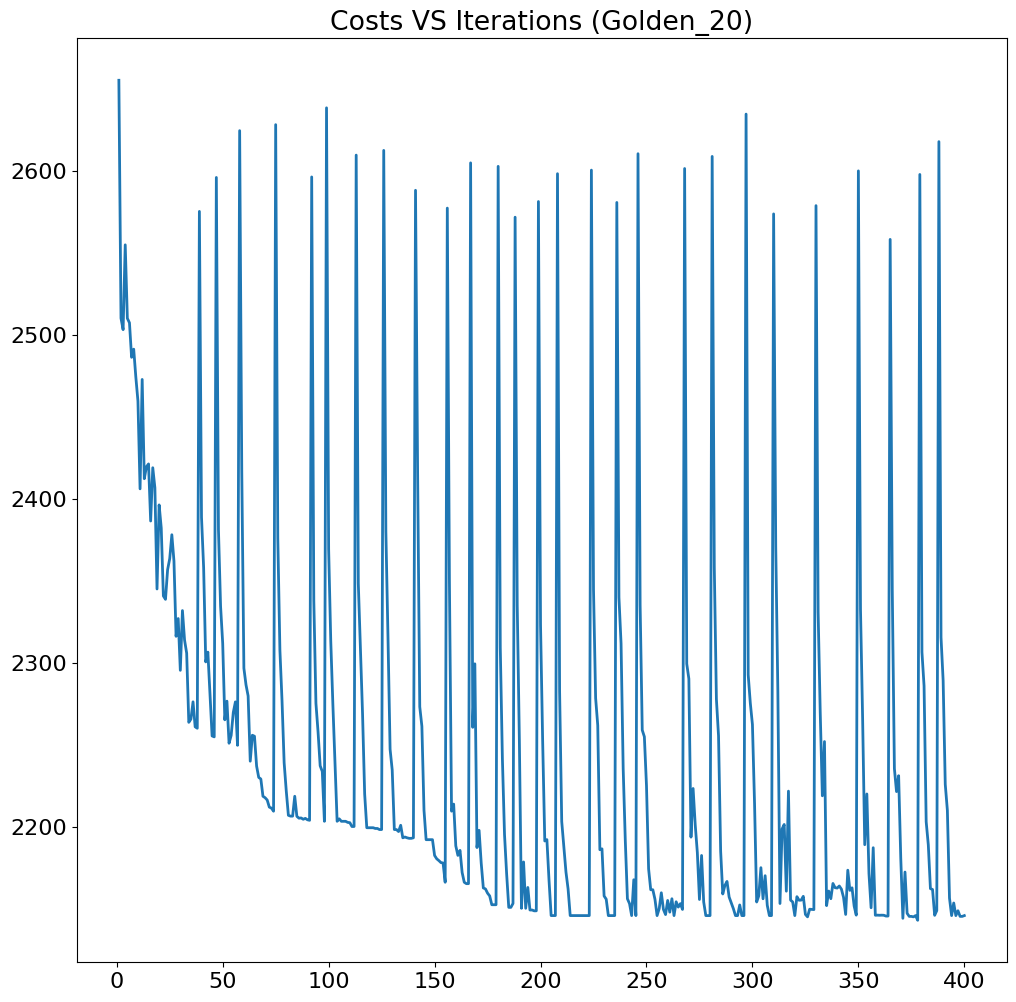

In [6]:
DisplayModel.render_solutions_descend(best_solutions, instance_name)
